# Installing and Importing required libraries

In [ ]:
! pip install -U ydata-profiling[notebook]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from ydata_profiling import ProfileReport #pandas_profiling

seed = 77

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 10.2 MB/s eta 0:00:00
   

# Data Loading and Preprocessing

In [ ]:
# Loading data of neurons from GitHub repository
url = "https://raw.githubusercontent.com/MarcosColetti/Dopamine_neuron_classification/main/data/data_neurons.csv"
data = pd.read_csv(url) #df = pd.read_csv(path_file)

In [ ]:
data.sample(7)

Unnamed: 0  ID_neurona  rata  sesion  mean_rate  std_rate  firing_rate  \
17           17         511    15      12        NaN       NaN          NaN   
541         541        1364     6       2   0.462397  0.297231    18.717035   
430         430        1071     8       6   0.683424  0.305400     4.592364   
183         183          92    16      13   0.184180  0.137764     1.626368   
132         132         753    15       4   0.396457  0.314907     1.215045   
148         148         812    15       2   0.386681  0.276301     4.747832   
56           56         564    15      11   0.525190  0.297126     0.056439   

     ISI_peak_time  ISI_index  ISI_ratio  ...  m_pre  m_post   DA  ISI_time  \
17             NaN        NaN        NaN  ...   0.12   10.84  2.0       NaN   
541           12.0   0.216249   0.004711  ...    NaN     NaN  2.0      12.0   
430            6.0   1.459468   0.020380  ...    NaN     NaN  2.0       6.0   
183           18.0   0.326077   0.001258  ...    NaN     NaN  2.0      18.0   
132           10.0   1.336078   0.004689  ...    NaN     NaN  2.0      10.0   
148           10.0   1.245078   0.012653  ...    NaN     NaN  2.0      10.0   
56            56.0  11.056049   0.053763  ...    NaN     NaN  2.0      56.0   

       ID  peak_ratio  peak_amplitude  slope_ratio  power_ratio  \
17    511    0.553396        0.106793   -89.333333     0.004850   
541  1364    0.726543        0.453087          NaN     0.000279   
430  1071    0.846476        0.692952          NaN     0.000165   
183    92    0.738774        0.477549          NaN     0.000654   
132   753    0.193562       -0.612877          NaN     0.000321   
148   812    0.153523       -0.692953          NaN     0.000409   
56    564    0.728225        0.456450          NaN     0.000293   

     AUC_tiempo_tot  
17             1.45  
541            3.11  
430             NaN  
183            2.27  
132            3.17  
148            2.64  
56             2.58  

[7 rows x 50 columns]

/tmp/ipython-input-2006404406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DA', data=data, palette='Set2')


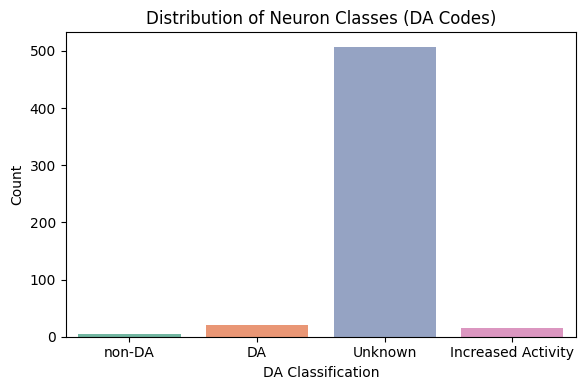

Summary of neuron classes:
             DA_class  count  percentage
0              non-DA      4        0.73
1                  DA     21        3.83
2             Unknown    507       92.52
3  Increased Activity     16        2.92


In [ ]:
#TEMP
# Plot distribution of DA classes
plt.figure(figsize=(6, 4))
sns.countplot(x='DA', data=data, palette='Set2')
plt.title("Distribution of Neuron Classes (DA Codes)")
plt.xlabel("DA Classification")
plt.ylabel("Count")
plt.xticks([0, 1, 2, 3], labels=["non-DA", "DA", "Unknown", "Increased Activity"])
plt.tight_layout()
plt.show()

# Summary table of counts and percentages
DA_summary = data['DA'].value_counts().sort_index().reset_index()
DA_summary.columns = ['DA_class', 'count']
DA_summary['percentage'] = (DA_summary['count'] / DA_summary['count'].sum() * 100).round(2)

DA_labels = {0: "non-DA", 1: "DA", 2: "Unknown", 3: "Increased Activity"}
DA_summary['DA_class'] = DA_summary['DA_class'].map(DA_labels)

print("Summary of neuron classes:")
print(DA_summary)


In [ ]:
# TEMP
# Filtro los clusters que:
# Tienen pocos spikes en behavior y tienen una waveform mala
# Son calidad 1
#ataA = df.query('estructura == "VTA" & clu_metric_error not in [1, 9] & peak_ratio.notnull() & calidad == 1')
#df_VTA = df.query('(estructura == "VTA" | estructura == "SNc")  & clu_metric_error not in [1, 9] & peak_ratio.notnull()')
#data = data.query('(estructura == "VTA" | estructura == "SNc")  & clu_metric_error not in [1, 9] & peak_ratio.notnull()')
#df_VTA = df.query('(estructura == "SNc")  & clu_metric_error not in [1, 9]')

# ---------------Excluir neuronas/ clasificarlas como tipo 2(neuronas a clasificar) ----------------
# --- Filtrado final 07/02/24 ---------------------

clu_DA_0          = [2,60,101,1405]
clu_DA_0_chequear = [504]
clu_DA_1          = [1,52,55]
clu_DA_1_chequear = [10,11,12,13,14,15,1402,1406]
clu_DA_2          = [50,51,54,91,93,96,99,102,103,124,125,493,500,532,535]
clu_DA_3          = [8,43,48,84,85,87,90,126,492,501,506,513,516,518,530,537,1404]

#al hacer el EDA. se cambio la codificacion de los siguientes clusters:
# [1407,1448,5] eran tipo 0
# [1403,9] eran tipo 1
clu_recodif       = [1407,1448,1403,9,5] #pasar a tipo2

#clusters malos por pocos spk, sucios, wf fea
clu_malos       = [89,135,497,503,505,507,508,512,513,514,515,518,520,531,
                   537,539,552,648,716,796,1123,1156,1213,1268,1311,1316,
                   1349,1524,1619,1626,1657,1664,530,533,528,1124,1292,
                   1404,1414,1443]

clu_wf_malas    = [1066,1067,1068,1069,1070,1071,1072,1073,1074,1076,1078,
                   1087,1088,1089,1090,1091,1093,1094,1101,1366]

# por las dudas poner clasificacion en 2
clu_ok          = [17,141,563,594,598,618,622,658,811,853,1227,1457,1492,
                   1514,1517,1567,1631]

# poner tmb clasific en 2, en caso de valor alejados sacar de la lista y clasificarlo como malo
clu_OK_revisar  = [85,565,687,692,731,752,785,842,1034,812]

clu_R15_S10 = list(range(566,592)) #sacar, no tienen eventos
clu_R06_S08 = list(range(1259,1266)) #sacar, no tienen eventos


#------ cambio la codificacion y dropeo los malos----
clu_drop = clu_malos + clu_wf_malas + clu_R15_S10 + clu_R06_S08
clu_tipo_2 = clu_DA_2 + clu_ok + clu_OK_revisar + clu_recodif
clu_tipo_1 = clu_DA_1 + clu_DA_1_chequear
clu_tipo_0 = clu_DA_0 + clu_DA_0_chequear
clu_tipo_3 = clu_DA_3

#cambio la codificacion de las neuronas correspondientes
# Marco como tipo 0 las neuronas de la lista clu_tipo_0
data.loc[data['ID_neurona'].isin(clu_tipo_0), 'DA'] = 0

# Marco como tipo 1 las neuronas de la lista clu_tipo_1
data.loc[data['ID_neurona'].isin(clu_tipo_1), 'DA'] = 1

# Marco como tipo 3 las neuronas de la lista clu_tipo_3
data.loc[data['ID_neurona'].isin(clu_tipo_3), 'DA'] = 3

# aseguro que los otros queden tipo 2
data.loc[data['ID_neurona'].isin(clu_tipo_2), 'DA'] = 2

# Elimino los clusters malos
data = data[~data['ID_neurona'].isin(clu_drop)]

#elimino columnas superfluas
data = data.drop(columns=['std_rate', 'mean_rate'])

/tmp/ipython-input-2006404406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DA', data=data, palette='Set2')


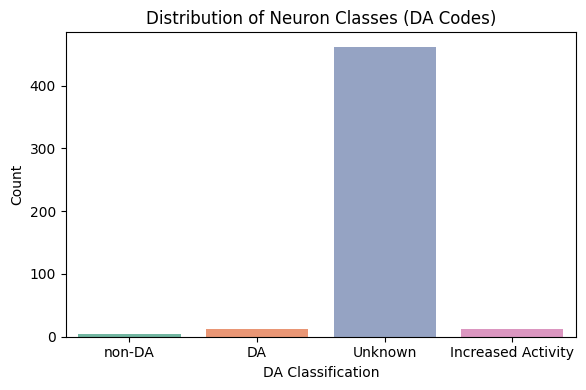

Summary of neuron classes:
             DA_class  count  percentage
0              non-DA      5        1.02
1                  DA     12        2.44
2             Unknown    462       93.90
3  Increased Activity     13        2.64


In [ ]:
#TEMP
# Plot distribution of DA classes
plt.figure(figsize=(6, 4))
sns.countplot(x='DA', data=data, palette='Set2')
plt.title("Distribution of Neuron Classes (DA Codes)")
plt.xlabel("DA Classification")
plt.ylabel("Count")
plt.xticks([0, 1, 2, 3], labels=["non-DA", "DA", "Unknown", "Increased Activity"])
plt.tight_layout()
plt.show()

# Summary table of counts and percentages
DA_summary = data['DA'].value_counts().sort_index().reset_index()
DA_summary.columns = ['DA_class', 'count']
DA_summary['percentage'] = (DA_summary['count'] / DA_summary['count'].sum() * 100).round(2)

DA_labels = {0: "non-DA", 1: "DA", 2: "Unknown", 3: "Increased Activity"}
DA_summary['DA_class'] = DA_summary['DA_class'].map(DA_labels)

print("Summary of neuron classes:")
print(DA_summary)


# Exploratory Data Analysis (EDA)

## General Description of the Dataset

***Data Overview***

We are working with neurons recorded from the **Ventral Tegmental Area (VTA) and Substantia Nigra pars compacta (SNc)**.
To identify putative dopaminergic neurons, an **apomorphine experiment** was conducted. This allowed us to classify some neurons as putative DA neurons based on their pharmacological response.

***DA Classification in the Dataset***

The classification of different neurons based on this experiment is stored in the `DA` column with the following encoding:
- **0:** Putative non-DA neuron
- **1:** Putative DA neuron
- **2:** Unknown
- **3:** Increased activity

*** Dataset Columns - Overview
- `ID_neurona`: Unique identifier for each recorded neuron.
- `rata`: Animal number indicating from which rat the recording was obtained.
- `sesion`: Session during which the neuron was recorded.
- `tetrodo`: Identifier for the tetrode (out of 8 implanted) that recorded the neuron.
- `calidad`: Indicates the quality of clustering (only clusters with quality 1 and 2 are used for analysis).
- `estructura`: Brain structure where the neuron was recorded (e.g., VTA or SNc).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 547
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          492 non-null    int64  
 1   ID_neurona          492 non-null    int64  
 2   rata                492 non-null    int64  
 3   sesion              492 non-null    int64  
 4   firing_rate         489 non-null    float64
 5   ISI_peak_time       483 non-null    float64
 6   ISI_index           482 non-null    float64
 7   ISI_ratio           487 non-null    float64
 8   CV                  487 non-null    float64
 9   CV2                 487 non-null    float64
 10  peak_time_ccg       482 non-null    float64
 11  potencia_tot        492 non-null    float64
 12  ancho_banda         492 non-null    float64
 13  frec_dominante      492 non-null    int64  
 14  pot_frec_dominante  492 non-null    float64
 15  pot_rango_freq      492 non-null    float64
 16  AUC          

In [ ]:
# TEMP
# change type of variables
data['DA'] = data['DA'].astype('int').astype('category')

In [ ]:
data.describe()

Unnamed: 0   ID_neurona        rata      sesion  firing_rate  \
count  492.000000   492.000000  492.000000  492.000000   489.000000   
mean   272.300813  1030.636179   12.684959    6.916667    10.006198   
std    153.389256   510.255441    3.329241    4.061037    12.077151   
min      0.000000     1.000000    6.000000    1.000000     0.000299   
25%    141.750000   618.750000   12.000000    4.000000     2.330276   
50%    267.500000  1166.500000   14.000000    6.000000     5.523421   
75%    396.250000  1502.250000   15.000000   10.000000    12.702265   
max    547.000000  1676.000000   16.000000   16.000000    85.514465   

       ISI_peak_time   ISI_index   ISI_ratio          CV         CV2  ...  \
count     483.000000  482.000000  487.000000  487.000000  487.000000  ...   
mean       33.420290    1.118269    0.018085    4.179281    0.870554  ...   
std        37.238875    1.569829    0.048112    7.471464    0.197442  ...   
min         2.000000    0.000000    0.000000    0.420000    0.240000  ...   
25%        12.000000    0.271342    0.000990    1.210000    0.760000  ...   
50%        20.000000    0.736791    0.003837    1.720000    0.920000  ...   
75%        32.000000    1.243695    0.011006    3.625000    1.000000  ...   
max       196.000000   11.056049    0.349226   80.570000    1.460000  ...   

          calidad      m_pre     m_post    ISI_time           ID  peak_ratio  \
count  492.000000  65.000000  65.000000  483.000000   492.000000  492.000000   
mean     1.400407   5.446769   6.938308   29.352381  1030.636179    0.572874   
std      0.585152   8.664321  11.675930   32.458348   510.255441    0.230495   
min      1.000000   0.000000   0.000000    1.400000     1.000000    0.061069   
25%      1.000000   0.660000   0.030000   12.000000   618.750000    0.364887   
50%      1.000000   2.530000   1.210000   20.000000  1166.500000    0.694706   
75%      2.000000   6.660000   9.620000   30.000000  1502.250000    0.745417   
max      3.000000  60.120000  65.740000  196.000000  1676.000000    0.847433   

       peak_amplitude  slope_ratio  power_ratio  AUC_tiempo_tot  
count      492.000000    60.000000   492.000000      492.000000  
mean         0.145747         -inf     0.001175        2.358537  
std          0.460991          NaN     0.002206        0.717630  
min         -0.877861         -inf     0.000126        1.040000  
25%         -0.270226    -1.476190     0.000317        1.900000  
50%          0.389411     0.322844     0.000502        2.270000  
75%          0.490834     0.872520     0.000879        2.760000  
max          0.694866     1.000000     0.019923        6.270000  

[8 rows x 44 columns]

In [ ]:
# Defining general columns for neurone identification
general_col = ['ID_neurona', 'rata', 'sesion', 'tetrodo', 'type', 'calidad', 'estructura', 'DA']

### Check for Missing Values and Handle Them

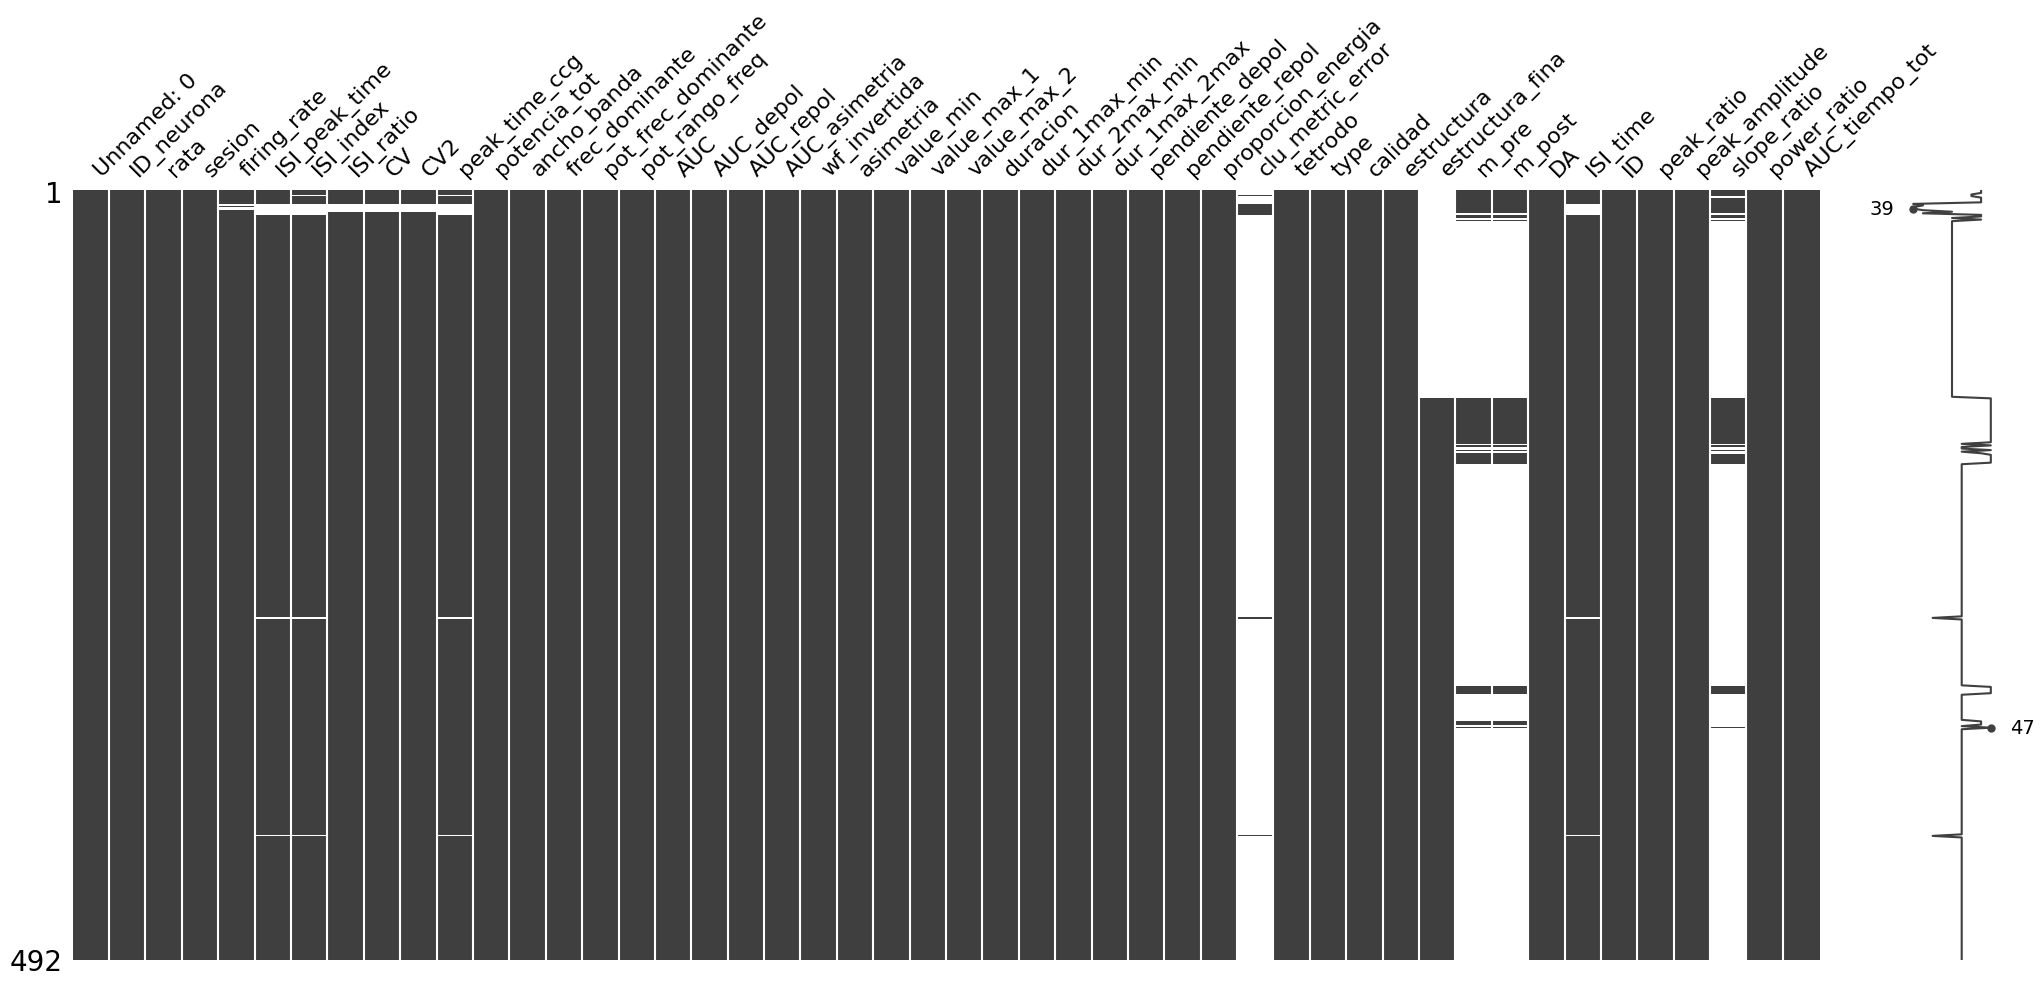

firing_rate           3
ISI_peak_time         9
ISI_index            10
ISI_ratio             5
CV                    5
CV2                   5
peak_time_ccg        10
clu_metric_error    482
estructura_fina     133
m_pre               427
m_post              427
ISI_time              9
slope_ratio         432
dtype: int64


In [ ]:
import missingno as msno
msno.matrix(data)
plt.show()

missing_summary = data.isnull().sum()
print(missing_summary[missing_summary > 0])

The column `clu_metric_error` flags neurons where key classification metrics couldn't be properly calculated because they had an insufficient number of spikes (value 1) or due to unknown issus (value 9). So, as a first step, we'll exclude those records. Then, we'll drop any metrics (columns) with too many missing values

In [ ]:
 initial_len = len(data)
 data = data[~data['clu_metric_error'].isin([1, 9])]  # exclude problematic clusters
 print(f"Removed {initial_len - len(data)} rows based on 'clu_metric_error'.")

Removed 10 rows based on 'clu_metric_error'.


In [ ]:
# dropping innecesary and missing values columns
cols_to_drop = ['estructura_fina','m_pre','m_post','slope_ratio','clu_metric_error','Unnamed: 0','ID','wf_invertida']
data_ok = data.drop(columns=cols_to_drop).copy()

# dropping neurons with 'calidad' == 3
data_ok = data_ok[data_ok['calidad'] != 3]

# Defining features columns for analysis
features_col = [col for col in data_ok.columns if col not in general_col]

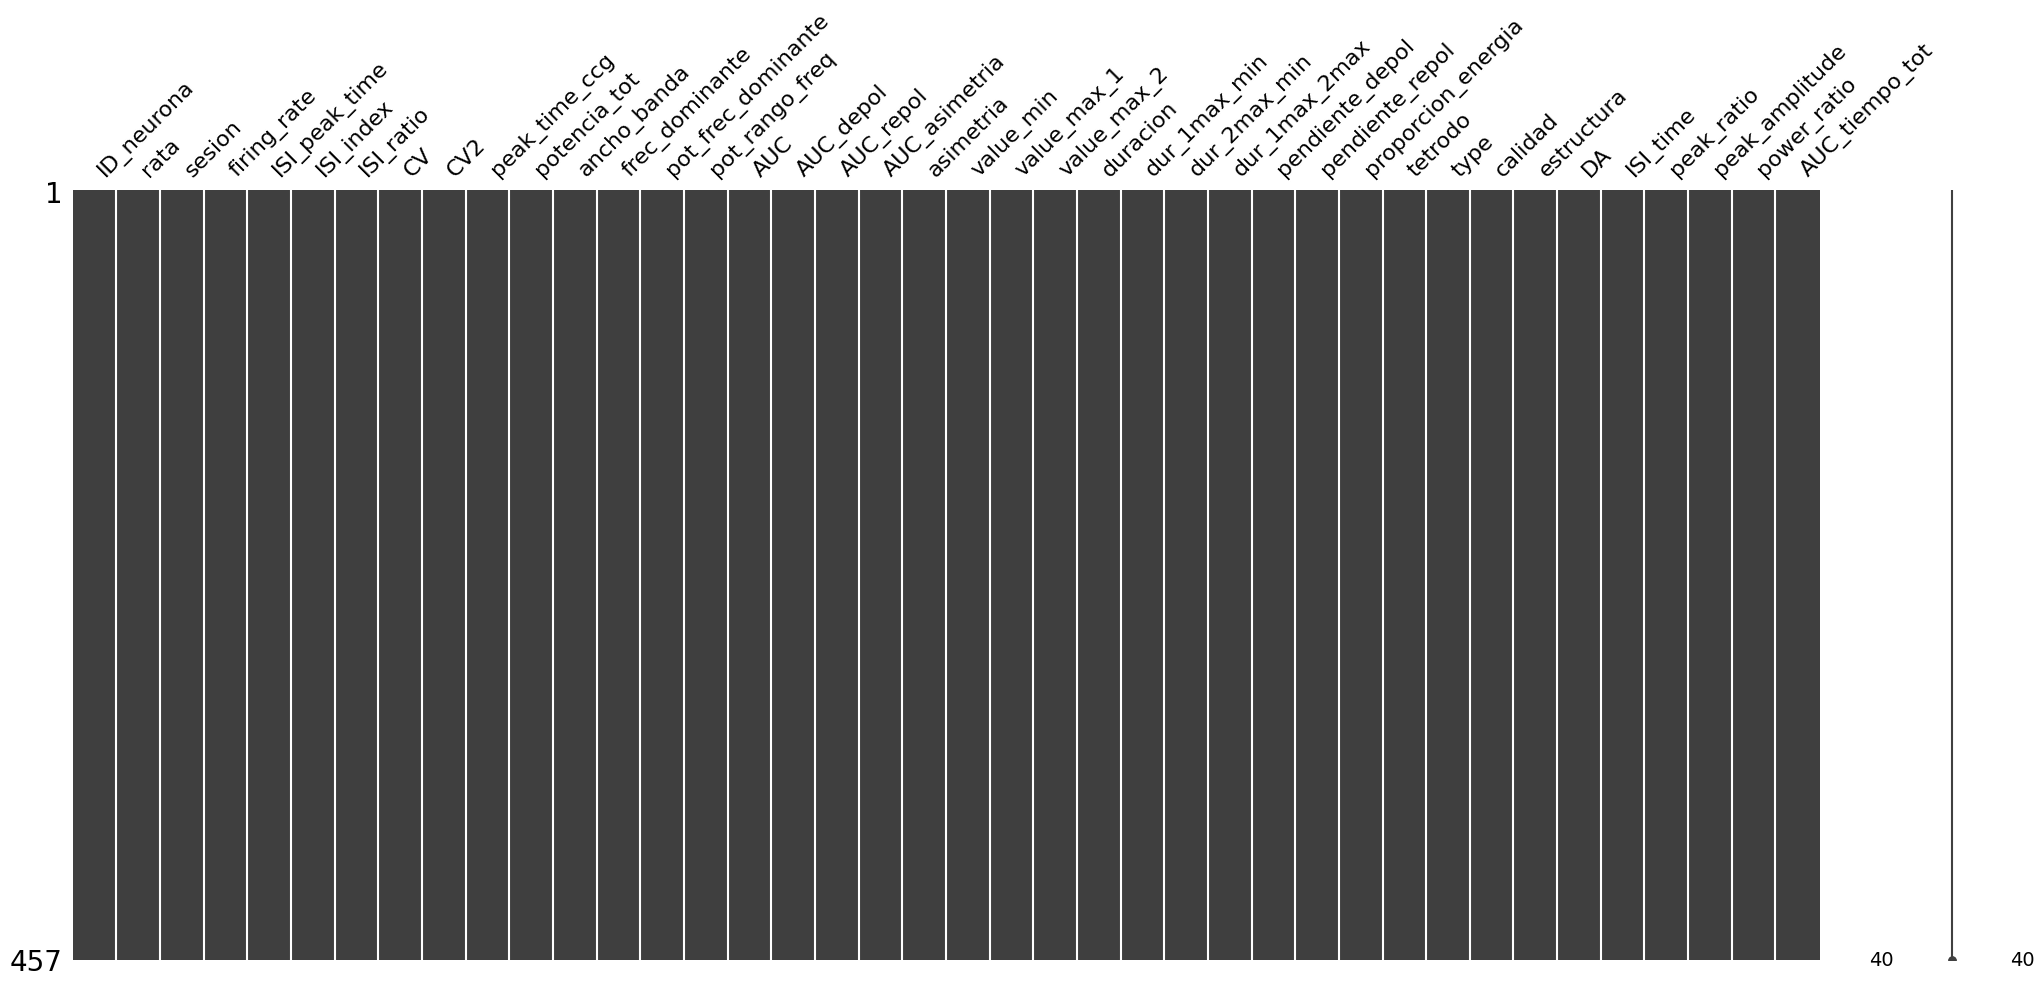

In [ ]:
msno.matrix(data_ok)
plt.show()

### Distribution of Neurons

In [ ]:
# Checking if structure names are correct
print(data_ok.estructura.unique())

['VTA' 'SNc']


In [ ]:
# Number of neurons by structure and quality of cluster
data_ok.groupby(['estructura','calidad']).size().reset_index(name='count')

estructura  calidad  count
0        SNc        1    143
1        SNc        2     47
2        VTA        1    169
3        VTA        2     98

In [ ]:
# Number of neurons by structure and DA classification
data_ok.groupby(['estructura','DA']).size().reset_index(name='count')

/tmp/ipython-input-647763680.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_ok.groupby(['estructura','DA']).size().reset_index(name='count')


estructura DA  count
0        SNc  0      0
1        SNc  1      0
2        SNc  2    185
3        SNc  3      5
4        VTA  0      5
5        VTA  1     12
6        VTA  2    244
7        VTA  3      6

In [ ]:
# Number of neurons in each DA classification for both structures by cluster quality
data_ok.groupby(['DA', 'calidad']).size().unstack()

/tmp/ipython-input-484759983.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_ok.groupby(['DA', 'calidad']).size().unstack()


calidad    1    2
DA               
0          3    2
1          5    7
2        300  129
3          4    7

Only neurons with cluster quality 1 and 2 will be used in the analysis

#### Final Distribution of Neuron Classes Based on Apomorphine Experiment

/tmp/ipython-input-784704542.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DA', data=data_ok, palette='Set2')


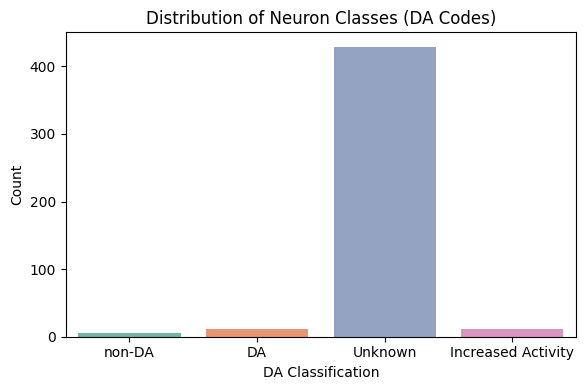

Summary of neuron classes:
             DA_class  count  percentage
0              non-DA      5        1.09
1                  DA     12        2.63
2             Unknown    429       93.87
3  Increased Activity     11        2.41


In [ ]:
# Plot distribution of DA classes
plt.figure(figsize=(6, 4))
sns.countplot(x='DA', data=data_ok, palette='Set2')
plt.title("Distribution of Neuron Classes (DA Codes)")
plt.xlabel("DA Classification")
plt.ylabel("Count")
plt.xticks([0, 1, 2, 3], labels=["non-DA", "DA", "Unknown", "Increased Activity"])
plt.tight_layout()
plt.show()

# Summary table of counts and percentages
DA_summary = data_ok['DA'].value_counts().sort_index().reset_index()
DA_summary.columns = ['DA_class', 'count']
DA_summary['percentage'] = (DA_summary['count'] / DA_summary['count'].sum() * 100).round(2)

DA_labels = {0: "non-DA", 1: "DA", 2: "Unknown", 3: "Increased Activity"}
DA_summary['DA_class'] = DA_summary['DA_class'].map(DA_labels)

print("Summary of neuron classes:")
print(DA_summary)


## Data Profiling of features

In [ ]:
# profile_report = ProfileReport(
#     #data_ok[general_col + features_col],
#     data_ok[features_col],
#     sort=None,
#     html={"style": {"full_width": True}},
#     progress_bar=True,
#     correlations={"auto": {"calculate": True},},
#     missing_diagrams={
#         "heatmap": False,
#         "matrix": False,
#         "dendrogram": False,},
#     explorative=False,
#     title="Profiling Report of metrics"
# )

# # Save the report into Drive
# profile_report.to_file("/content/profiling_report.html")

# # Downloading the report to the local PC
# from google.colab import files
# files.download("/content/profiling_report.html")


# profile_report


# Visualizing Potential Outliers

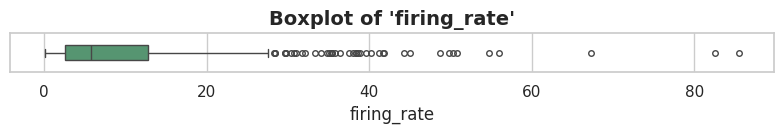

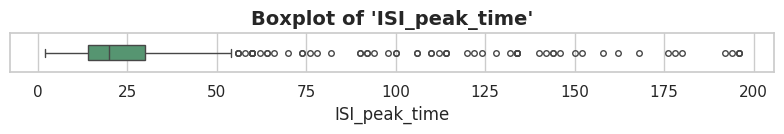

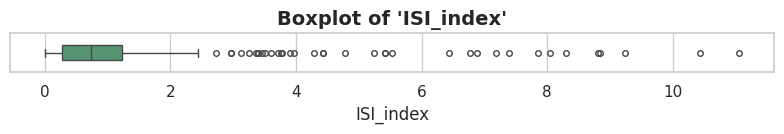

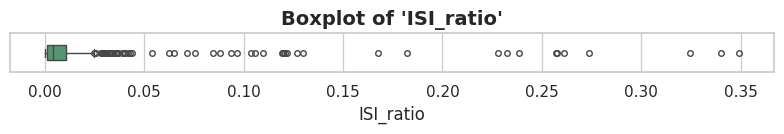

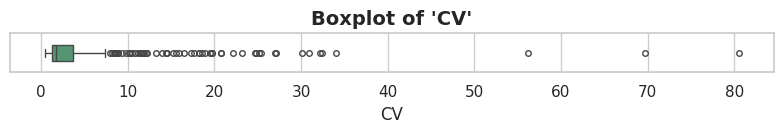

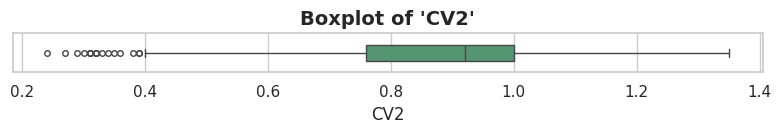

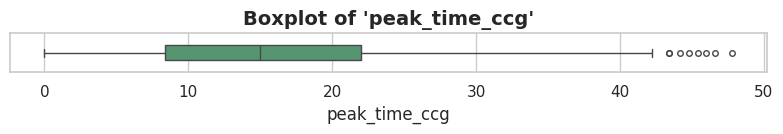

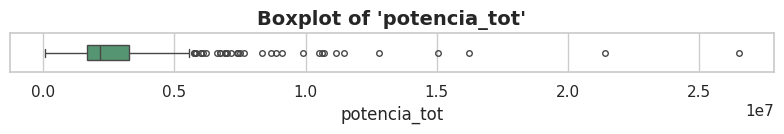

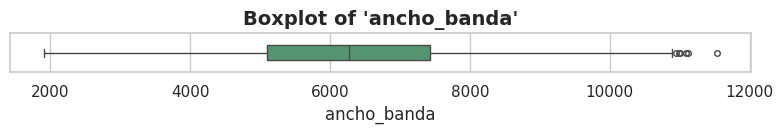

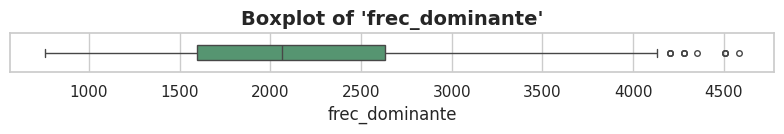

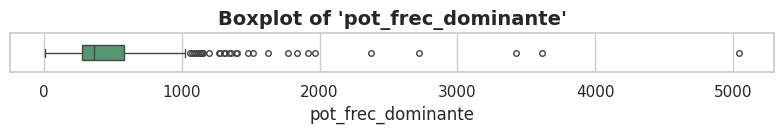

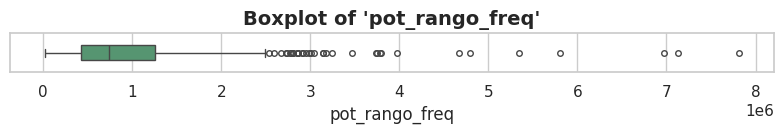

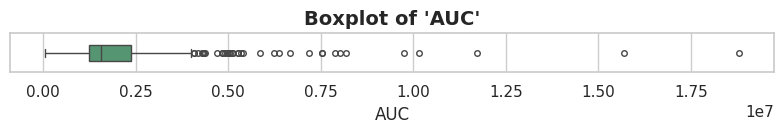

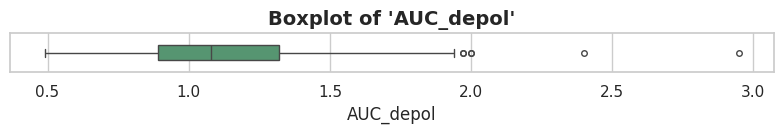

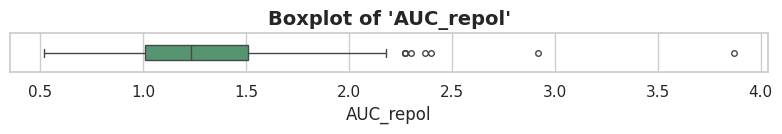

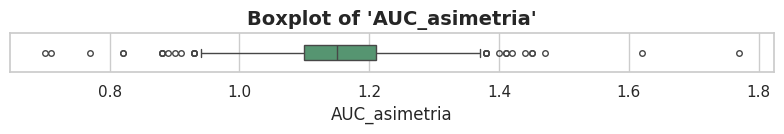

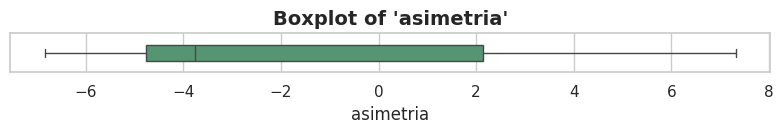

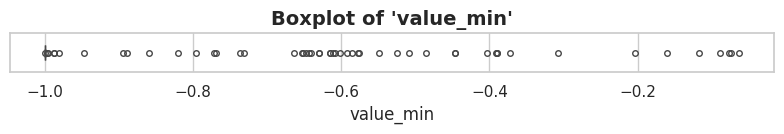

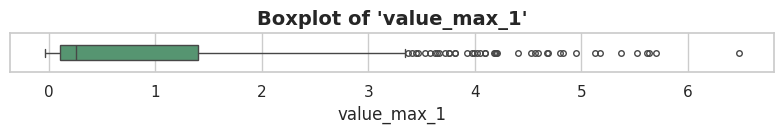

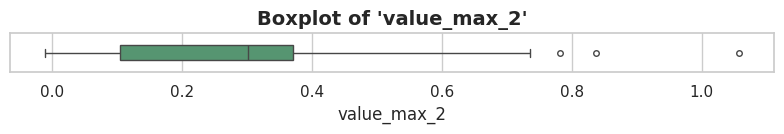

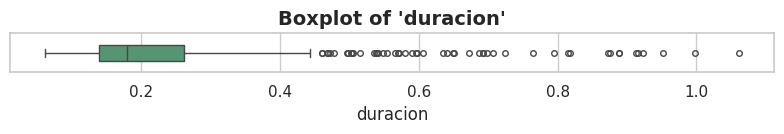

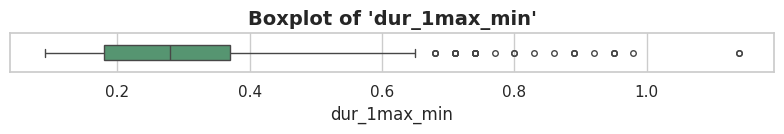

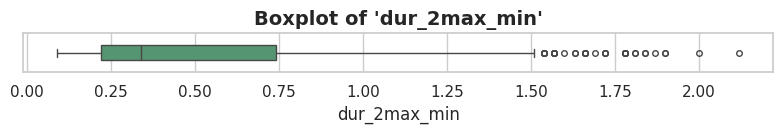

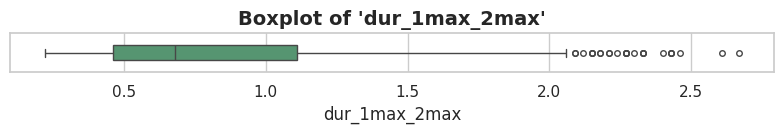

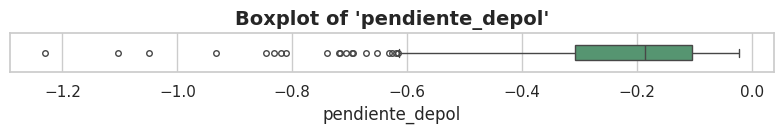

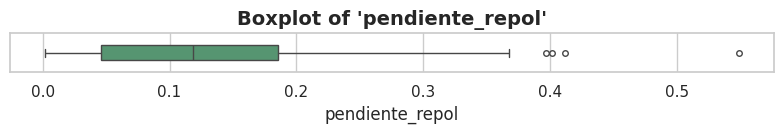

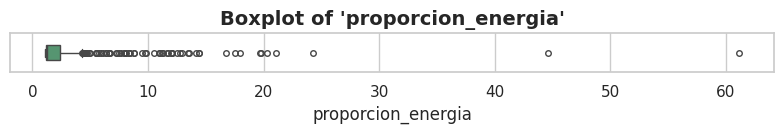

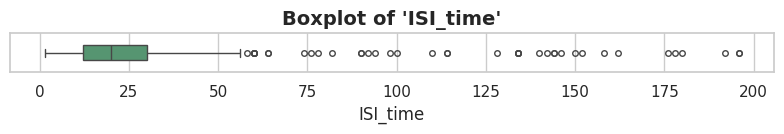

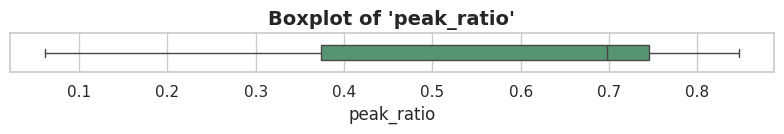

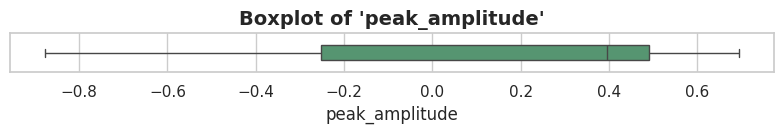

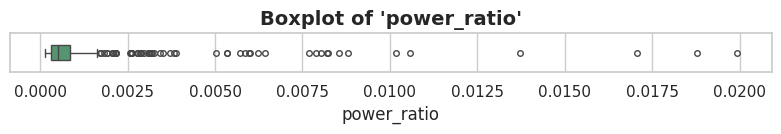

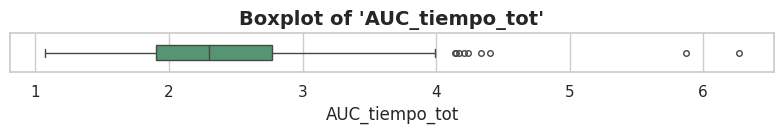

In [ ]:
sns.set(style="whitegrid", palette="Set2")

for metric in features_col:
    plt.figure(figsize=(8, 1.5))

    sns.boxplot(
        x=data_ok[metric],
        color="#4C9F70",
        width=0.4,
        fliersize=4)

    plt.title(f"Boxplot of '{metric}'", fontsize=14, weight='bold')
    plt.xlabel(metric, fontsize=12)
    plt.tight_layout()
    plt.show()


## Outlier removal and feature pruning

In [ ]:
# List of metrics to check for outliers
metrics_of_interest = ['CV', 'potencia_tot', 'pot_frec_dominante', 'AUC', 'proporcion_energia', 'power_ratio']

# Apply filter conditions for potential outliers
outlier = (
    (data_ok['CV'] > 40) |
    (data_ok['potencia_tot'] > 2*1e7) |
    (data_ok['pot_frec_dominante'] > 3000) |
    (data_ok['AUC'] > 1.5*1e7) |
    (data_ok['proporcion_energia'] > 30) |
    (data_ok['power_ratio'] > 0.0125)
)

# Show the records (outliers) to be removed
cols_to_show = general_col + features_col
outlier_candidates = data_ok.loc[outlier, cols_to_show]
print("Outlier records to be removed:")
display(outlier_candidates)


Outlier records to be removed:


ID_neurona  rata  sesion  tetrodo type  calidad estructura DA  \
30          532    15      12        8   SU        1        SNc  2   
32          534    15      12        8   SU        1        SNc  2   
182          91    16      13        2   SU        2        VTA  2   
264        1580    14       4        2   SU        1        VTA  2   
265        1581    14       4        2   SU        1        VTA  2   
399        1516    12       2        7   SU        2        VTA  2   
457        1129     8       5        7   SU        1        SNc  2   
481        1212     8       1        5   SU        1        SNc  2   
483        1214     8       1        5   SU        1        SNc  2   
492        1229     6      10        2   SU        1        VTA  2   
496        1247     6       9        2   SU        1        VTA  2   
514        1305     6       5        1   SU        1        VTA  2   

     firing_rate  ISI_peak_time  ...  dur_2max_min  dur_1max_2max  \
30     37.490562           10.0  ...          0.12           0.28   
32     10.165223           16.0  ...          0.65           0.80   
182    19.675980          168.0  ...          0.12           0.28   
264    12.721020           14.0  ...          0.28           0.49   
265     6.210469           16.0  ...          0.18           0.52   
399     0.842468           12.0  ...          1.26           1.94   
457     3.808593           40.0  ...          1.26           1.90   
481     5.367078           16.0  ...          0.12           0.25   
483    14.299382            2.0  ...          0.12           0.25   
492     3.442965           22.0  ...          0.58           0.77   
496     2.988726           20.0  ...          0.58           0.83   
514    44.207153           12.0  ...          0.18           0.52   

     pendiente_depol  pendiente_repol  proporcion_energia  ISI_time  \
30         -0.355475         0.329657                1.66      10.0   
32         -0.343077         0.050785                1.47      16.0   
182        -0.316123         0.347466                1.55       7.6   
264        -0.159512         0.146982                1.16      14.0   
265        -0.095172         0.226930                1.17      16.0   
399        -0.045981         0.002342               44.59      12.0   
457        -0.048915         0.001578               61.17      40.0   
481        -0.417865         0.329973                1.39       2.0   
483        -0.421296         0.330308                1.40       2.0   
492        -0.289131         0.056558                1.32      22.0   
496        -0.226986         0.058422                1.37      20.0   
514        -0.096664         0.218751                1.13      12.0   

     peak_ratio  peak_amplitude  power_ratio  AUC_tiempo_tot  
30     0.562628        0.125256     0.013707            1.16  
32     0.582959        0.165919     0.000677            1.50  
182    0.632665        0.265330     0.019923            1.07  
264    0.755948        0.511897     0.000560            2.30  
265    0.734441        0.468881     0.000786            1.90  
399    0.072645       -0.854711     0.000753            1.75  
457    0.061069       -0.877861     0.000846            1.93  
481    0.598279        0.196558     0.017075            1.07  
483    0.593407        0.186813     0.018771            1.07  
492    0.576439        0.152879     0.000707            2.03  
496    0.550694        0.101389     0.000492            2.34  
514    0.761901        0.523802     0.000534            2.03  

[12 rows x 40 columns]

Outliers with extreme values will be removed as they deviate significantly from the typical values observed in the dataset, potentially distorting subsequent analyses. Neurons with extreme values were identified as being classified as DA = 2, which are not considered putative dopaminergic neurons, so removing them does not affect the integrity of the classification. Additionally, the features `ISI_peak_time` and `peak_time_ccg` will be removed due to redundancy, as other metric capture the same information more effectively (`ISI_time`). The feature `value_min` will also be dropepd du to lack of information.

In [ ]:
# TEMP
#data_ok = data_ok[~outlier]

In [ ]:
features_to_remove = ['value_min', 'ISI_peak_time', 'peak_time_ccg'] #'value_max_1', 'value_max_2',
data_ok = data_ok.drop(columns=features_to_remove)

# Update features_col
features_col = [col for col in data_ok.columns if col not in general_col]

# Feature Importance

## Correlation analysis for feature redundancy

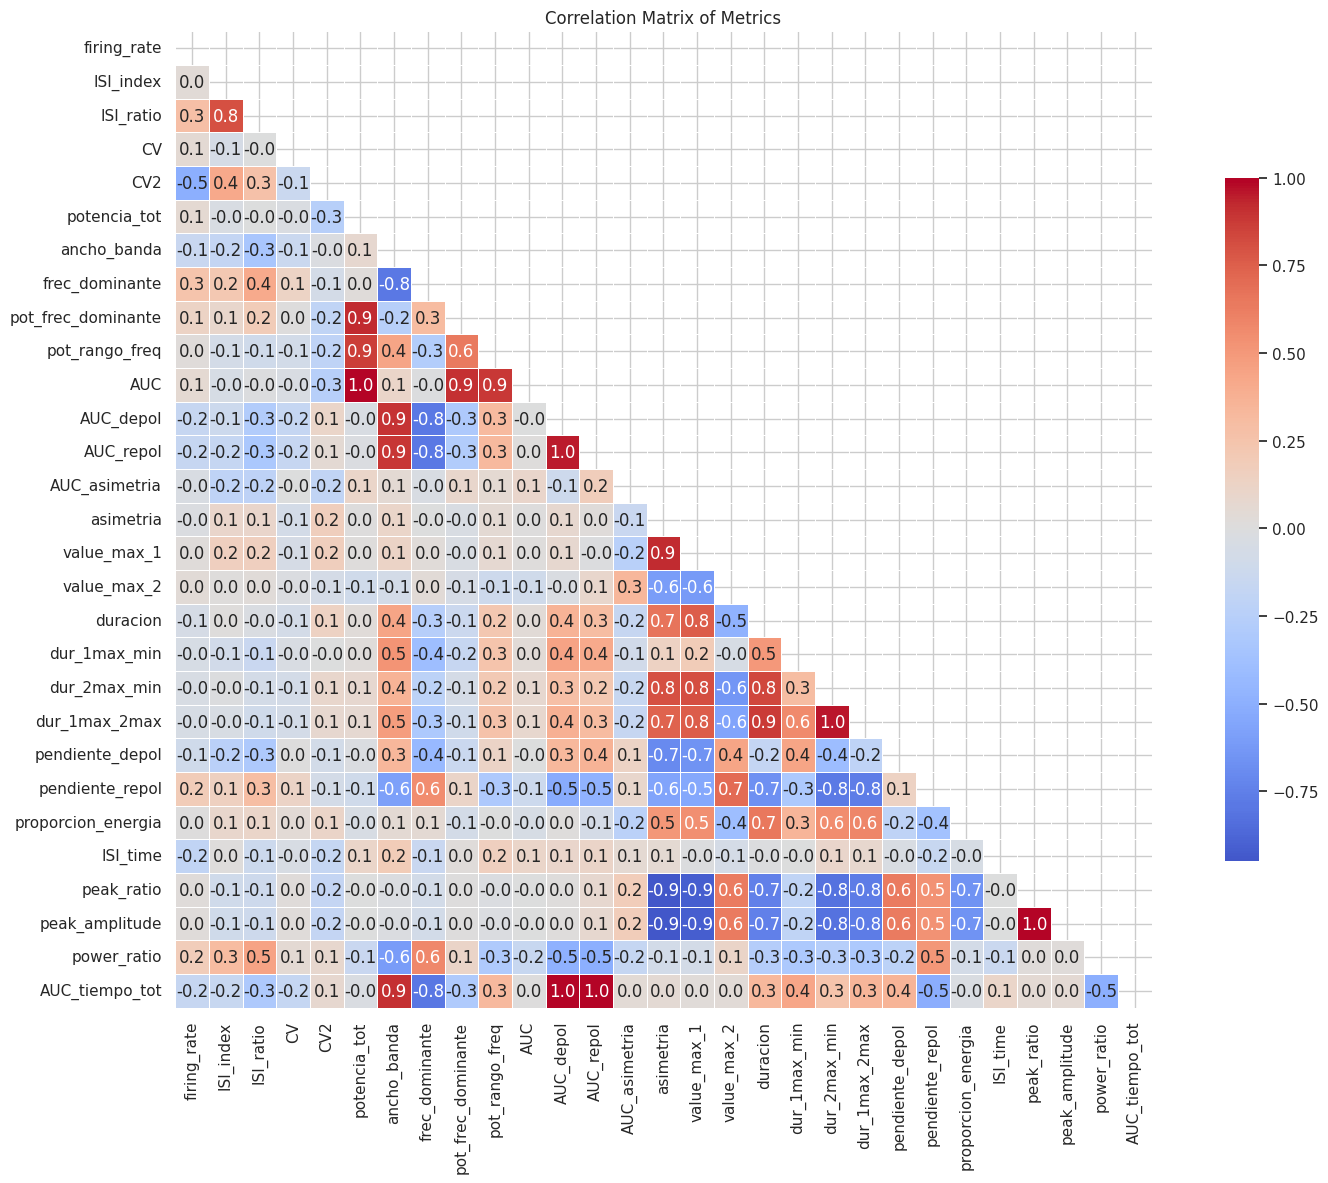

In [ ]:
# Calculating the correlation matrix
correlation_matrix = data_ok[features_col].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Visualizing the correlation matrix
plt.figure(figsize=(16, 12)) # 18, 15
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".1f",linewidths=0.5,
            square=True, cbar_kws={"shrink": .7},center=0)


#sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Metrics")
plt.tight_layout()
plt.show()



Features with very high pairwise correlation (greater than 0.9) were removed to avoid redundancy and simplify the feature space. These features typically carry overlapping information, which can distort clustering and reduce interpretability.

However, features with a correlation of exactly 0.9 were retained when they captured complementary aspects of neuronal activity or when their inclusion was expected to provide additional discriminative value in downstream analyses.

In [ ]:
# metric_to_exclude = ['AUC_tiempo_tot','peak_amplitude','dur_2max_min','AUC_depol','AUC_repol','pot_frec_dominante','potencia_tot','value_max_1','value_max_2','duracion','asimetria','pot_rango_freq','value_min']
# features_to_exclude = ['AUC_depol','AUC_repol','AUC_tiempo_tot','potencia_tot','dur_2max_min','peak_amplitude'
                      #  ,'pot_frec_dominante','pot_rango_freq','value_max_1','duracion','asimetria']

# features_to_exclude = ['AUC_tiempo_tot','peak_amplitude','dur_2max_min','AUC_depol']
features_to_exclude = ['potencia_tot','AUC_tiempo_tot','AUC_depol','AUC_repol','peak_amplitude','dur_2max_min']

# Final metrics for Analysis
features_filtered = [col for col in features_col if col not in features_to_exclude]

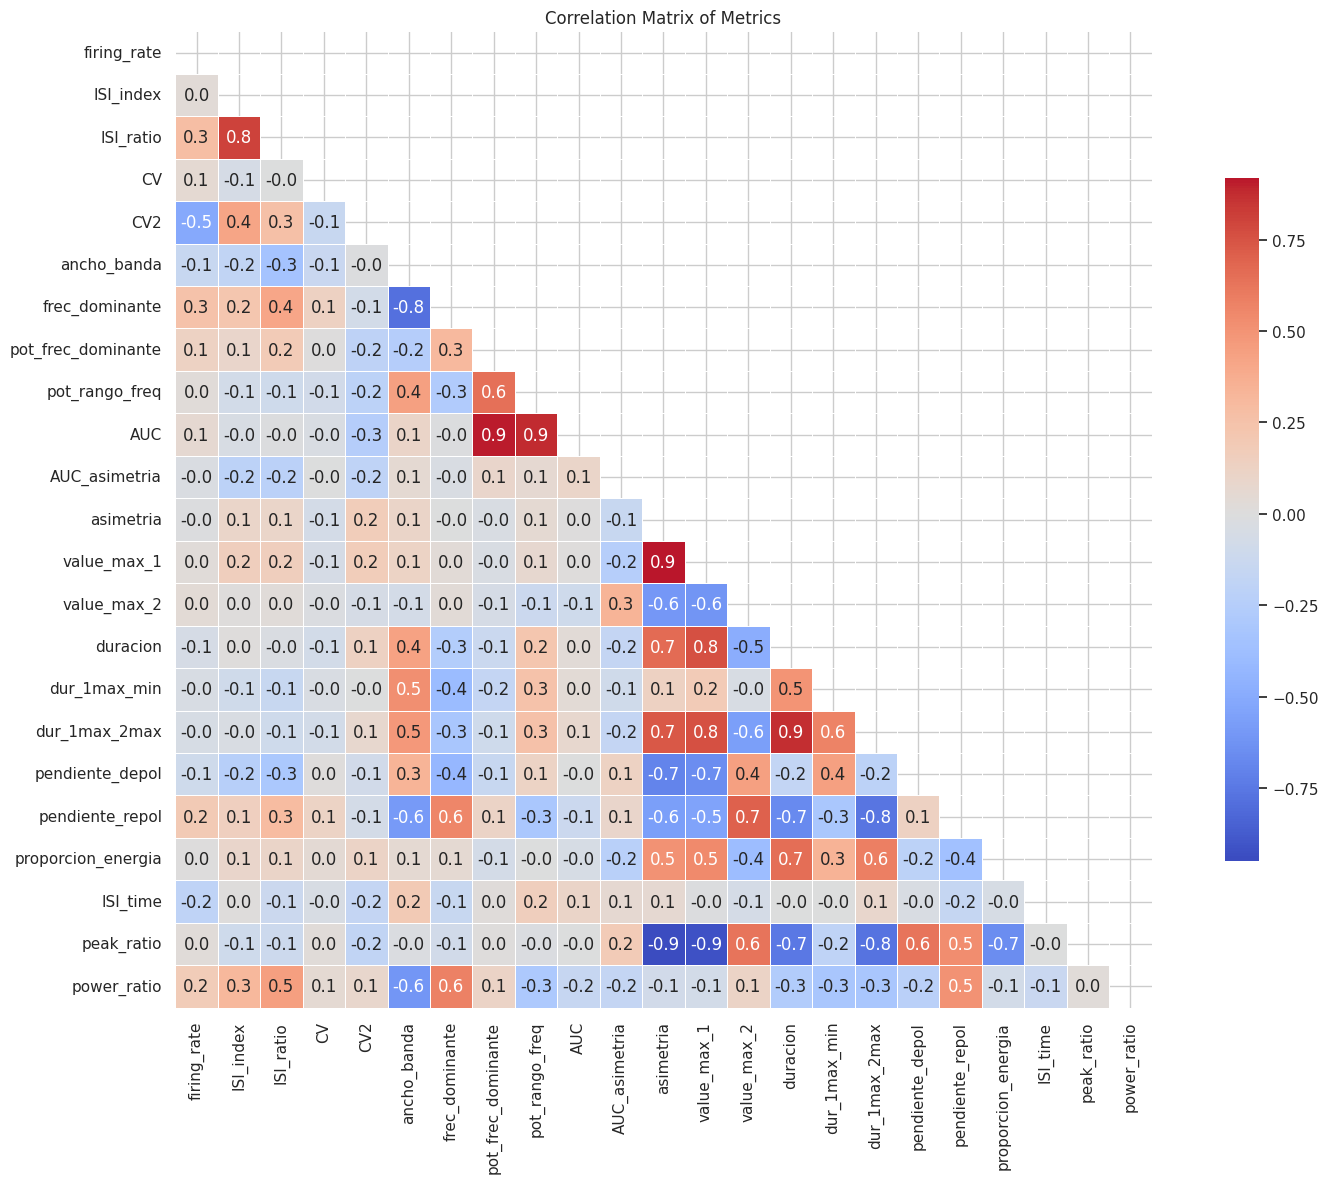

In [ ]:
# Calculating the correlation matrix
correlation_matrix = data_ok[features_filtered].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Visualizing the correlation matrix
plt.figure(figsize=(16, 12)) # 18, 15
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".1f",linewidths=0.5,
            square=True, cbar_kws={"shrink": .7},center=0)


#sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Metrics")
plt.tight_layout()
plt.show()

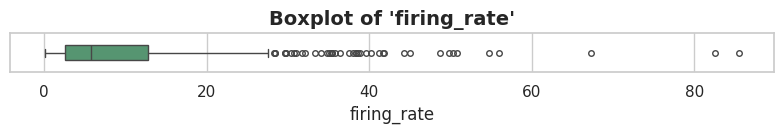

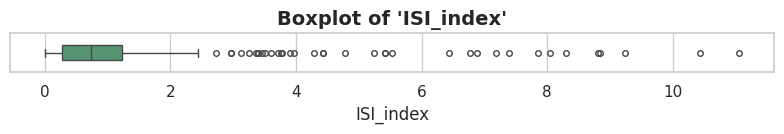

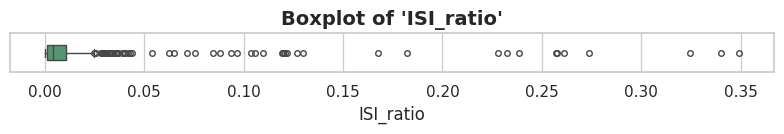

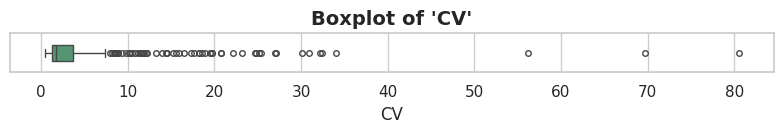

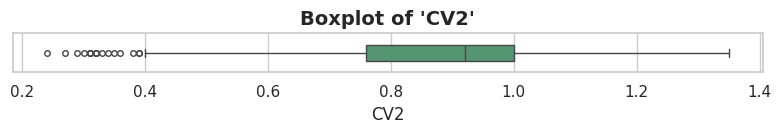

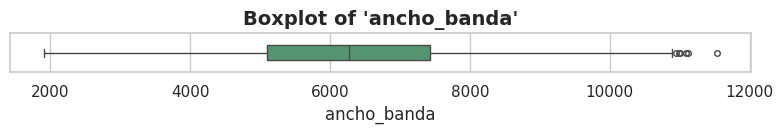

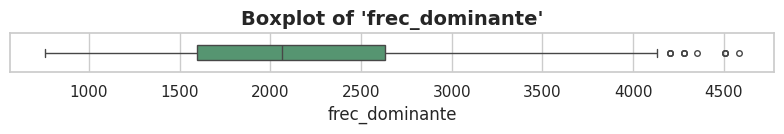

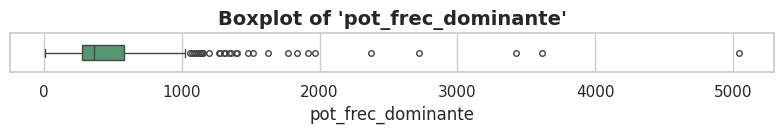

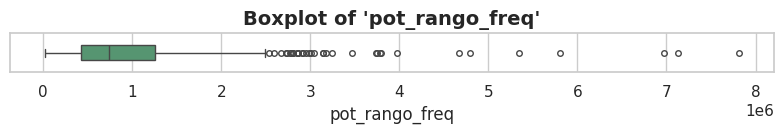

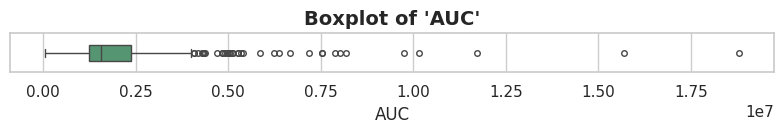

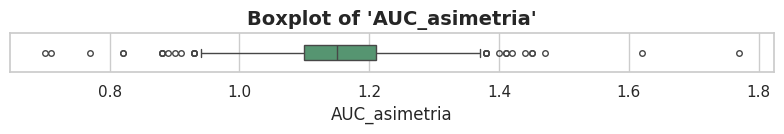

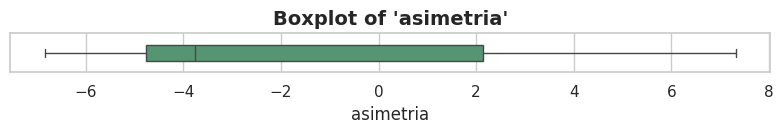

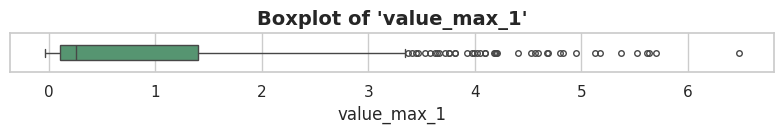

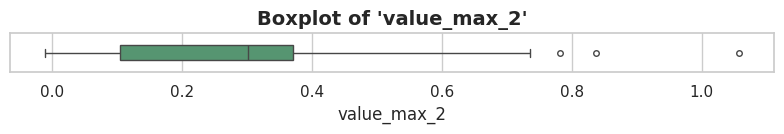

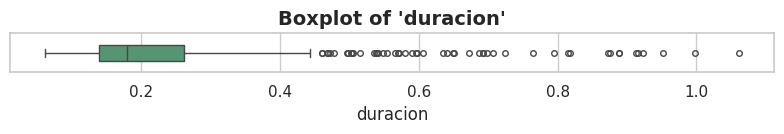

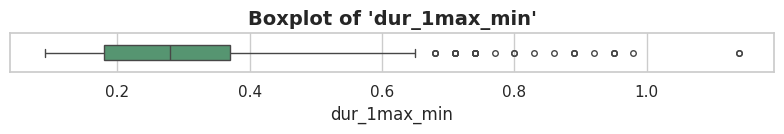

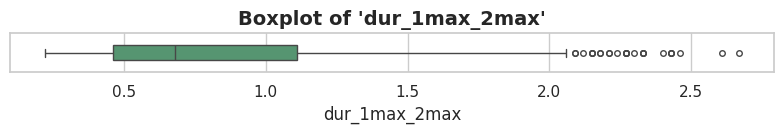

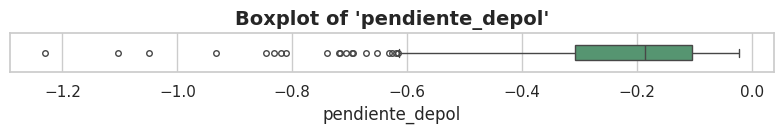

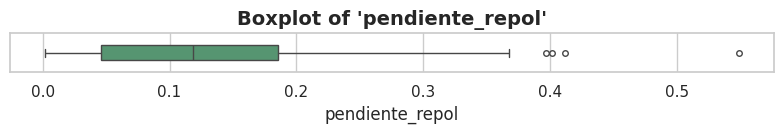

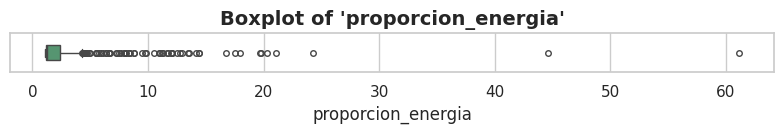

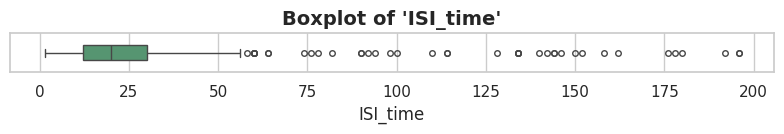

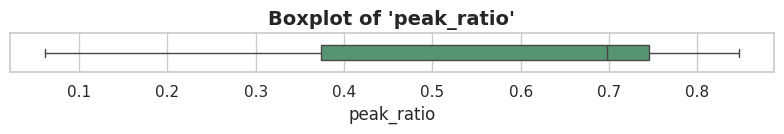

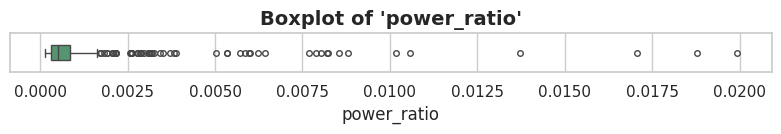

In [ ]:
sns.set(style="whitegrid", palette="Set2")

for metric in features_filtered:
    plt.figure(figsize=(8, 1.5))

    sns.boxplot(
        x=data_ok[metric],
        color="#4C9F70",
        width=0.4,
        fliersize=4)

    plt.title(f"Boxplot of '{metric}'", fontsize=14, weight='bold')
    plt.xlabel(metric, fontsize=12)
    plt.tight_layout()
    plt.show()

## PCA and Biplot Analysis

The only reliable labels available are those classified as DA = 1 (putative dopaminergic) based on apomorphine experiment. All other classes (0, 2, 3) are uncertain.
PCA analysis will help us explore whether these DA neurons form a distinct cluster in the feature space

Standarizing features

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_ok[features_filtered])

# Convert the scaled features back into a dataframe preserving the same index (ID_neurona)
df_features_scaled = pd.DataFrame(features_scaled, columns=features_filtered, index=data_ok.index)
data_scaled = pd.concat([data_ok[general_col], df_features_scaled], axis=1)

PCA Computation

In [ ]:
from sklearn.decomposition import PCA

X_pca = data_scaled[features_filtered]

# Apply PCA keeping enough components to explain ~90% of the variance
pca_model = PCA(n_components=10)
X_pca_transformed = pca_model.fit_transform(X_pca)


Variance Explained Plot

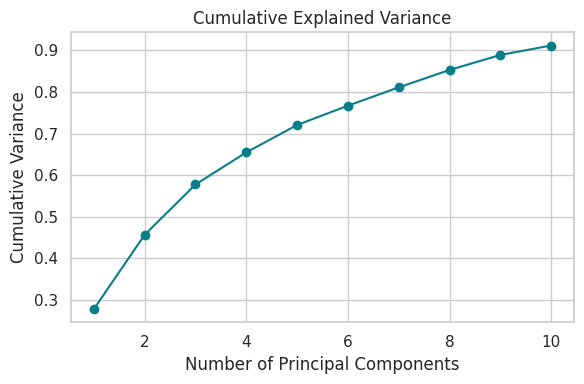

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(
    range(1, len(pca_model.explained_variance_ratio_) + 1),
    pca_model.explained_variance_ratio_.cumsum(),
    marker='o',
    color='#087E8B'
)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.tight_layout()
plt.show()


PCA Biplot

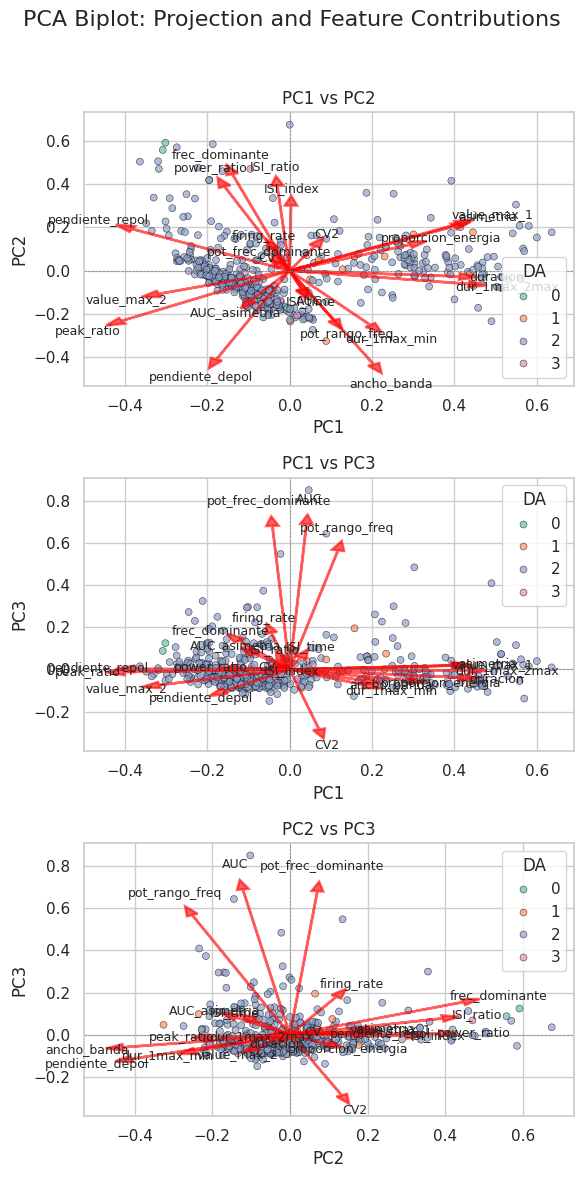

In [ ]:
# PCA coords: PC1, PC2, PC3
pca_coords = X_pca_transformed[:, :3]
coeff = pca_model.components_[:3, :].T
labels = df_features_scaled.columns.tolist()

# Arrow scale factor to make loadings more visible
arrow_scale = 1.3

# Setup plot
fig, axes = plt.subplots(3, 1, figsize=(6, 12))
fig.suptitle("PCA Biplot: Projection and Feature Contributions", fontsize=16, y=0.98)
palette = sns.color_palette("Set2", n_colors=data_scaled['DA'].nunique()) #Set2
pairs = [(0,1), (0,2), (1,2)]
titles = ["PC1 vs PC2", "PC1 vs PC3", "PC2 vs PC3"]

for ax, (i, j), title in zip(axes, pairs, titles):
    # Normalize coordinates for better scaling
    scalex = 1.0 / (pca_coords[:, i].max() - pca_coords[:, i].min())
    scaley = 1.0 / (pca_coords[:, j].max() - pca_coords[:, j].min())

    sns.scatterplot(
        x=pca_coords[:, i] * scalex,
        y=pca_coords[:, j] * scaley,
        hue=data_scaled['DA'],
        palette=palette,
        s=25,
        edgecolor='k',
        alpha=0.7,
        ax=ax,
    )

    # Plot coeff vectors (arrows)
    for k in range(coeff.shape[0]):
        x_arrow = coeff[k, i] * arrow_scale
        y_arrow = coeff[k, j] * arrow_scale
        ax.arrow(
            0, 0, x_arrow, y_arrow,
            color='red', alpha=0.6,
            head_width=0.03,
            linewidth=1.8, length_includes_head=True
        )
        ax.text(
            x_arrow * 1.1,
            y_arrow * 1.1,
            labels[k],
            fontsize=9,
            ha='center',
            va='center'
        )

    ax.set_xlabel(f"PC{i+1}")
    ax.set_ylabel(f"PC{j+1}")
    ax.set_title(title)
    ax.axhline(0, color='gray', lw=0.5, linestyle='--')
    ax.axvline(0, color='gray', lw=0.5, linestyle='--')
    ax.grid(True)


plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

In [ ]:
# Calculate the loadings (eigenvectors) for the first 3 principal components
# Each row represents a feature and its contribution to PC1, PC2, and PC3
loadings = pca_model.components_[:3, :].T * np.sqrt(pca_model.explained_variance_[:3])
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'])
loading_df['Feature'] = df_features_scaled.columns.tolist()

# Compute total loading magnitude for each feature (norm of the loading vector)
loading_df['magnitude'] = np.sqrt(
    loading_df['PC1']**2 + loading_df['PC2']**2 + loading_df['PC3']**2)

# Scatter plot with loading points
fig = px.scatter_3d(x=loading_df['PC1'], y=loading_df['PC2'], z=loading_df['PC3'],
    text=loading_df['Feature'],
    color_discrete_sequence=['royalblue'])

fig.update_traces(textposition='bottom center')

# Add black arrow lines from origin to each loading point
for i in range(len(loading_df)):
    fig.add_trace(go.Scatter3d(
        x=[0, loading_df.iloc[i]['PC1']],
        y=[0, loading_df.iloc[i]['PC2']],
        z=[0, loading_df.iloc[i]['PC3']],
        mode='lines',
        line=dict(color='black', width=3),
        showlegend=False))

# Layout
fig.update_layout(height=500, width=600,
    title_text='PCA Loadings: 3D Biplot',
    scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))

fig.show()

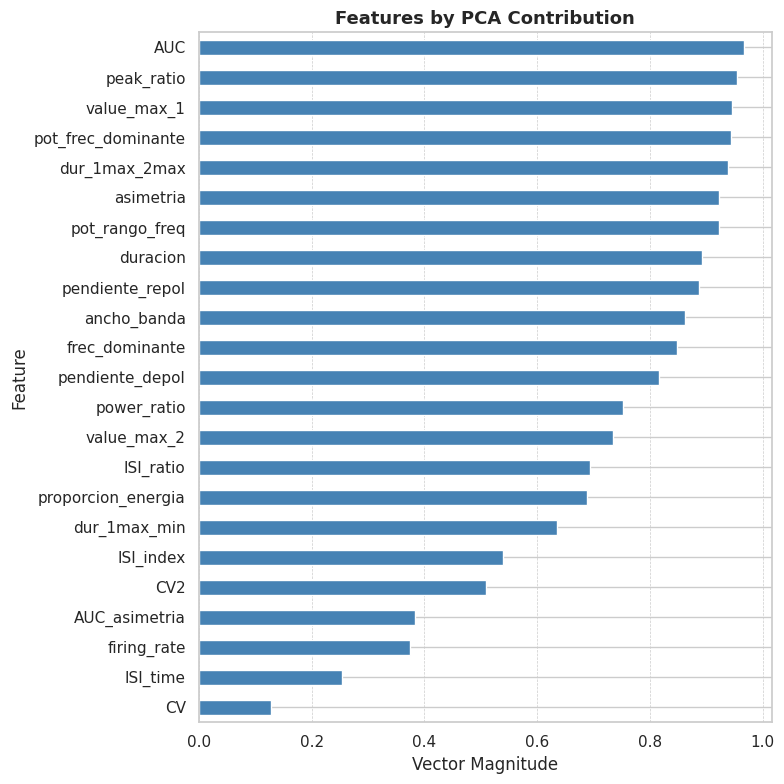

In [ ]:
sorted_features = loading_df.sort_values('magnitude', ascending=False).set_index('Feature')

fig, ax = plt.subplots(figsize=(8, 8))
sorted_features['magnitude'].sort_values().plot.barh(ax=ax, color='steelblue')

ax.set_title("Features by PCA Contribution", fontsize=13, weight='bold')
ax.set_xlabel("Vector Magnitude")
ax.set_ylabel("Feature")
ax.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Selected Features

The final set of features was selected based on several criteria: low pairwise correlation, contribution to principal components, and relevance to known physiological properties of neuronal activity. This selection balances commonly used metrics with others that provide complementary information, capturing distinct aspects of single-unit behavior including firing dynamics, spike waveform morphology, and spectral structure.



NUEVO: se sacan value_max_1 y value_max_2 porque pueden estar influenciados por ruido en el waveform del spike y ya se tiene una metrica mas robusta que toma en cuenta estos valores (peak_to_ratio).



Features such as `firing_rate`, `CV`, and `ISI_ratio` were included due to their established utility in distinguishing regular vs. irregular spiking patterns and bursting behavior.

Additional features were selected to capture information not reflected by firing statistics alone. `ISI_time` represents the average interspike interval and quantify spike timing structure, while `dur_1max_2max` and `peak_ratio` describe waveform geometry and asymmetry—morphological characteristics often associated with dopaminergic neurons in extracellular recordings (Grace & Bunney, 1983; Fujisawa et al., 2008).

Spectral features such as `frec_dominante`, `power_ratio`, `ancho_banda`, and `AUC` were included to characterize the energy distribution and frequency content of spikes—dimensions rarely used in traditional classification but shown to improve discriminability in recent studies (e.g., Berke, 2008).

Finally, `AUC_asimetria` was included as a distinct morphological descriptor, quantifying the energy imbalance between the depolarization and repolarization phases, with minimal redundancy across features.

In [ ]:
# features = ['firing_rate', 'CV', 'ISI_ratio', 'ISI_time', 'dur_1max_2max', 'peak_ratio', 'frec_dominante', 'power_ratio', 'ancho_banda', 'AUC', 'AUC_asimetria']
# features = features_filtered

features = ['firing_rate','ISI_ratio','ISI_index','CV2','dur_1max_2max','pendiente_depol',
            'pendiente_repol','peak_ratio','AUC','ancho_banda','power_ratio']


# Neuron Classification

## Feature Exploration and Visualization

### Correlation Matrix of Selected Features


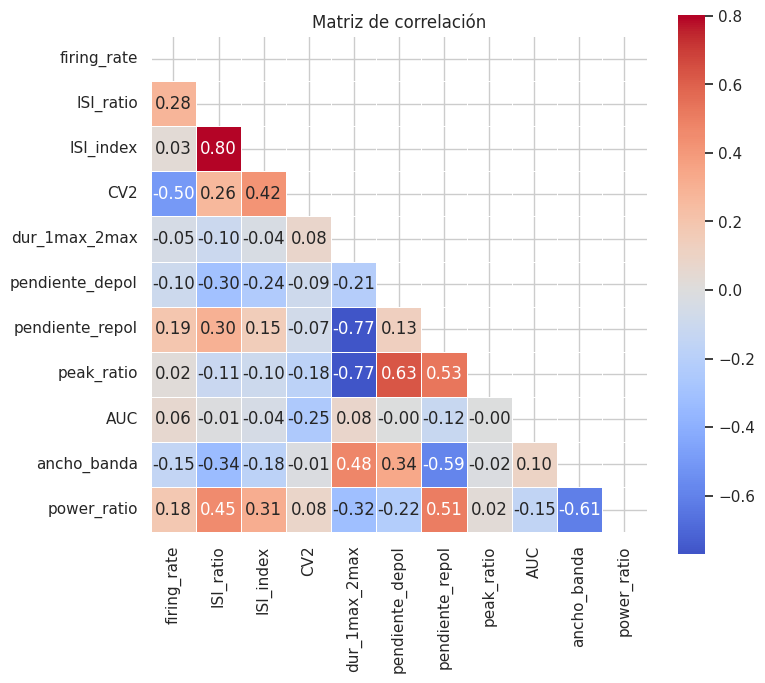

In [ ]:
#calculo la matriz de correlacion
corr = data_scaled[features].corr(numeric_only=True)

#--Grafico----
plt.figure(figsize=(8, 10))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            square=True, cbar_kws={"shrink": .7},center=0)
plt.title("Matriz de correlación")
plt.show()

### Visualizing Relationships Between Variables

Matrix of scatterplots to visualize how pairs of features relate to one another. It will provides us an overview of potential relationships and correlations within the data, helping to identify patterns and important interactions between features.

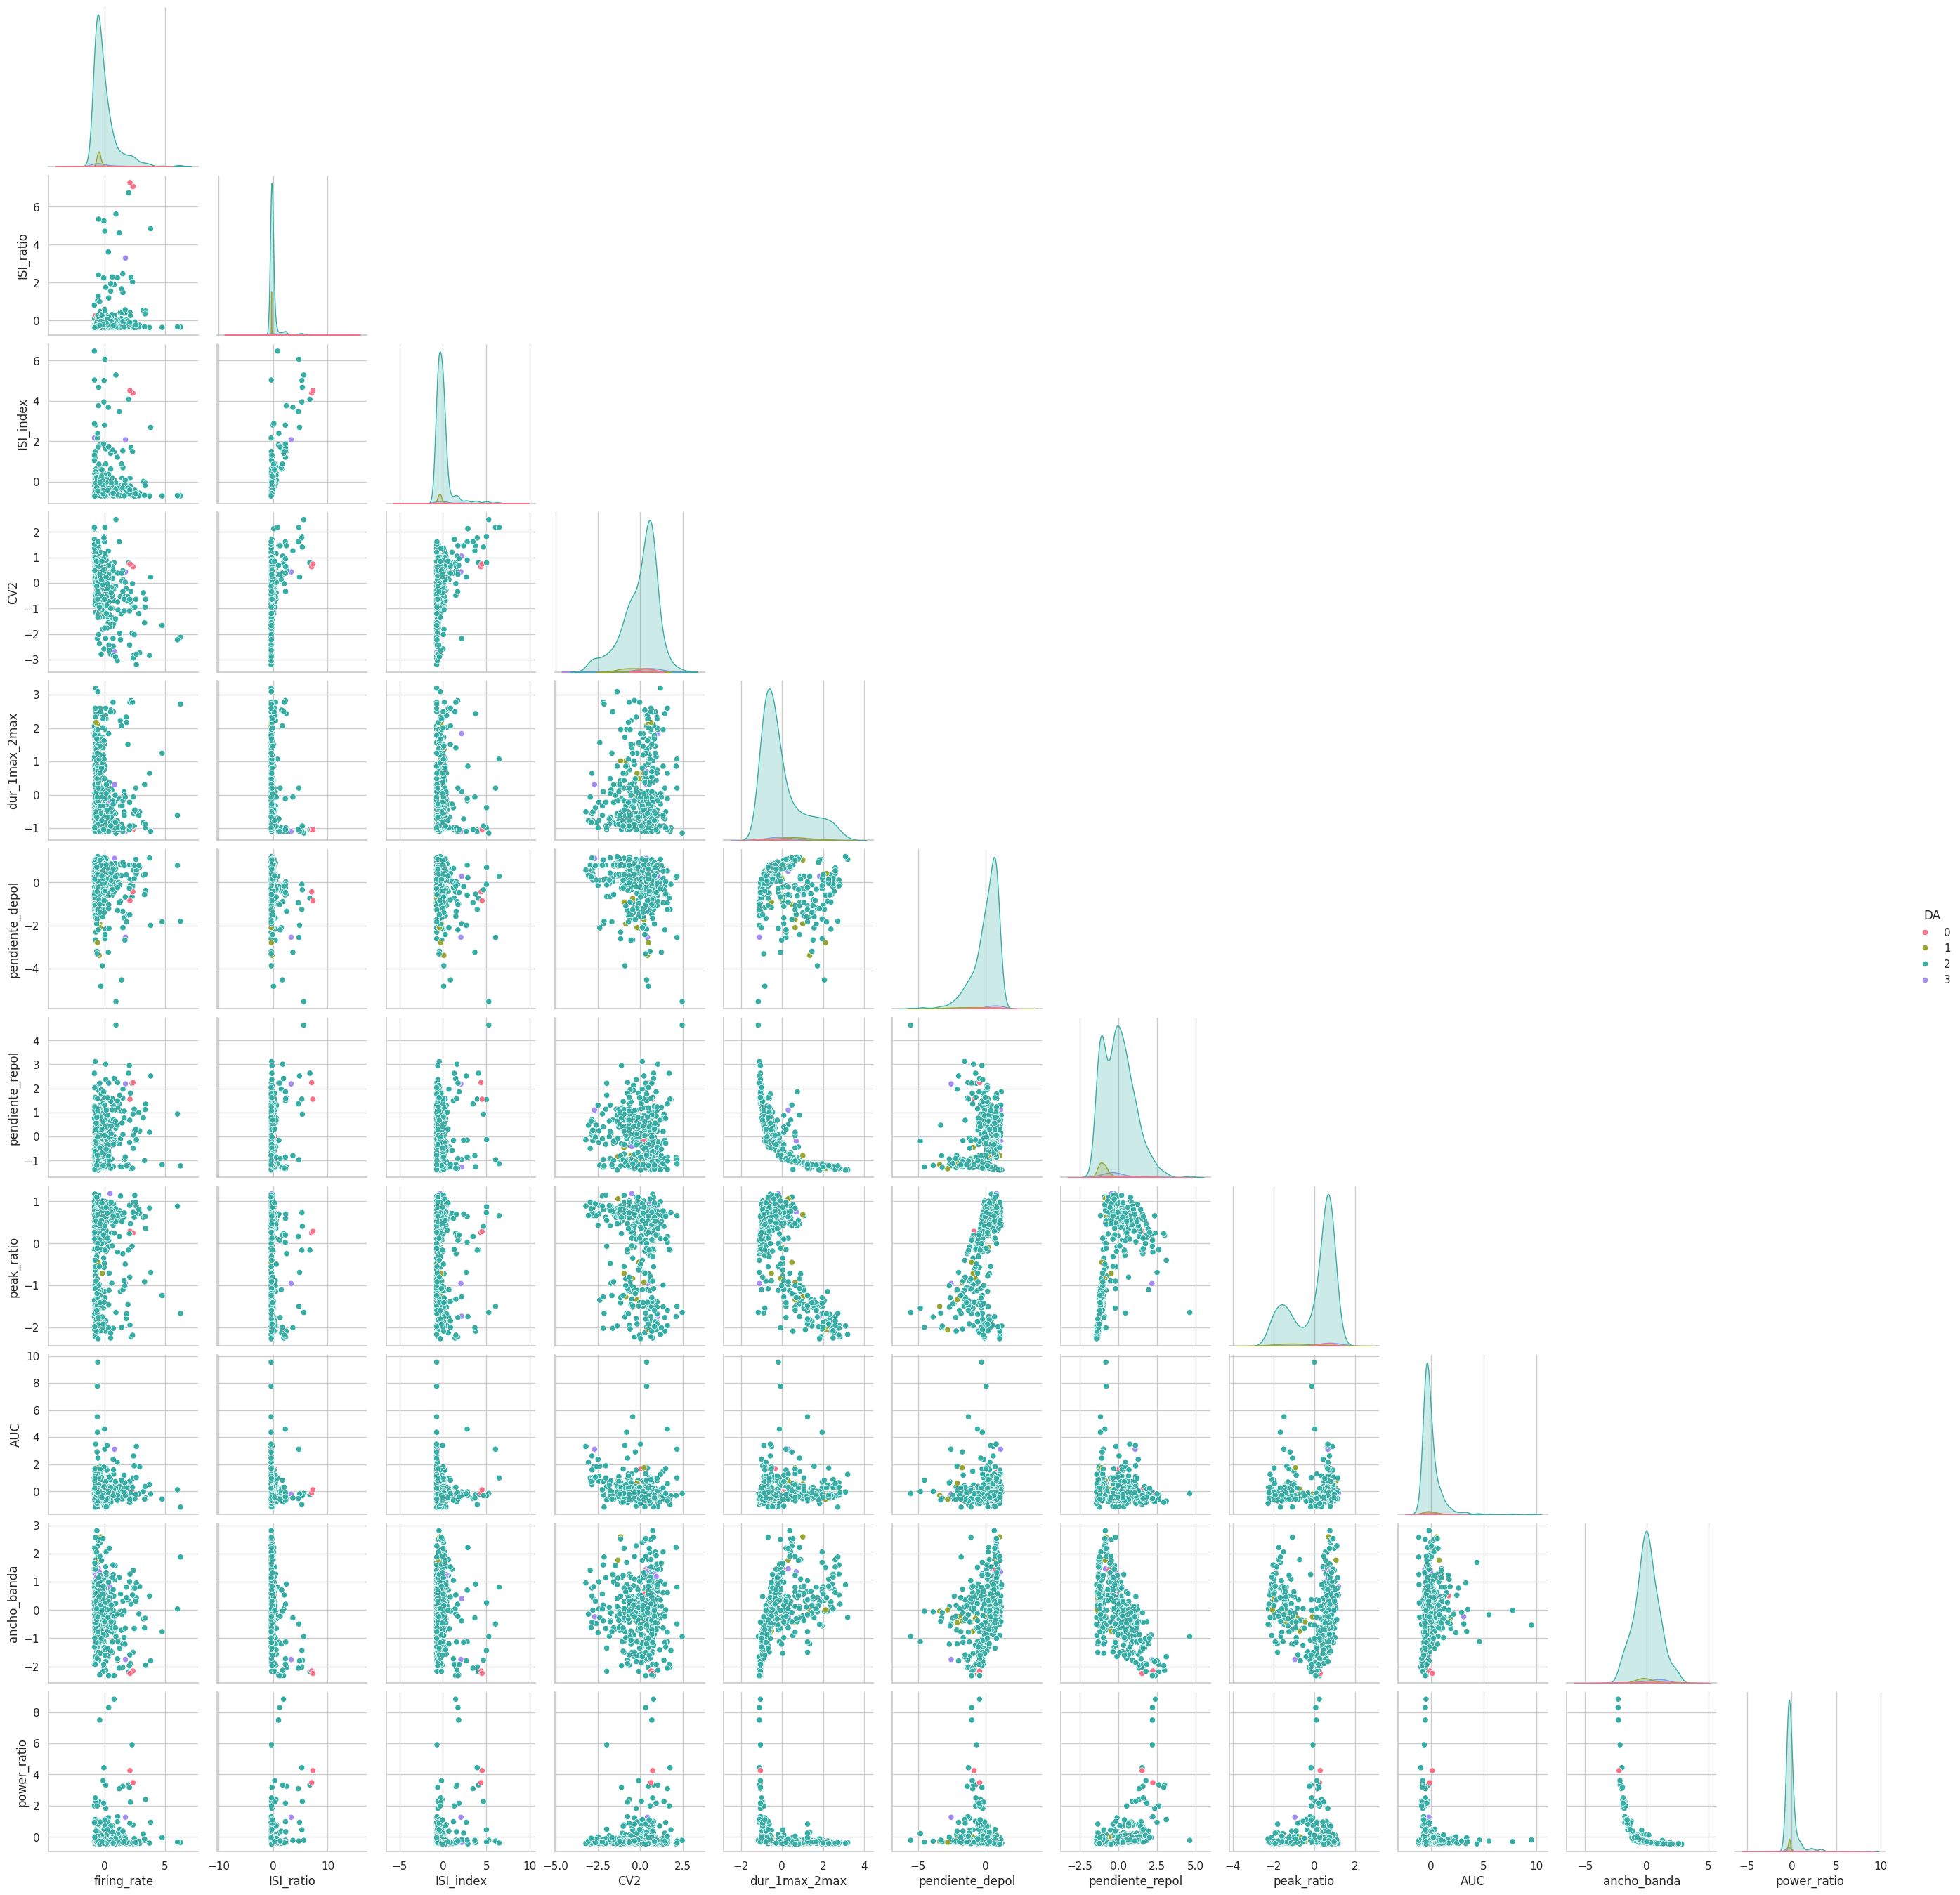

In [ ]:
sns.pairplot(data_scaled,vars = features, hue = 'DA', corner=True, diag_kind = "kde", palette='husl')
#diag_kind = "kde"



### Visualization of Neurons Based on Key Features

Visualization of the distribution of neurons in 2D and 3D spaces using features commonly referenced in the literature for classifying dopaminergic neurons. This will give us insight into how the neurons are distributed and their separability based on these features.

In [ ]:
#@title Auxiliar function
def create_feature_plot(df, features, category):
    """
    Create a 2D or 3D scatter plot based on the number of features provided

    Parameters:
    - df: DataFrame containing the data to plot
    - features: List of features to plot (either 2 or 3)
    - category: Column name for coloring the points based on category

    Returns:
    - Plotly figure: The generated scatter plot
    """

    # Mapping colors for categories in 'DA' column
    color_map = {0: 'yellow', 1: 'blue', 2: 'grey', 3: 'red'}

    # Create the scatter plot depending on number of features
    if len(features) == 2:
        fig = px.scatter(df, x=features[0], y=features[1],
                         color=category, color_discrete_map=color_map,
                         labels={'x': features[0], 'y': features[1]},
                         title=f'Relationship between {features[0]} and {features[1]}',
                         width=600, height=500,
                         custom_data=['ID_neurona'])

        fig.update_traces(marker=dict(size=10, line=dict(color='black', width=0.3)),
                          textposition='top center',
                          hovertemplate="ID_neurona: %{customdata}")

    elif len(features) == 3:
        fig = px.scatter_3d(df,x=features[0], y=features[1], z=features[2],
                            color=category, color_discrete_map=color_map,
                            labels={'x': features[0], 'y': features[1], 'z': features[2]},
                            title=f'Relationship between {features[0]}, {features[1]}, and {features[2]}',
                            width=750, height=500,
                            custom_data=['ID_neurona'])

        fig.update_traces(marker=dict(size=5, line=dict(color='black', width=0.1)),
                          textposition='top center',
                          hovertemplate="ID_neurona: %{customdata}")

    # Update legend labels to include category values
    if category == 'DA':
        # Custom labels for the categories in DA
        labels = {
                  0: 'Putative non-DA (0)',
                  1: 'Putative DA (1)',
                  2: 'Unknown (2)',
                  3: 'Increased Activity (3)'}
        fig.for_each_trace(lambda t: t.update(name=labels[int(t.name)]))

    fig.show()


In [ ]:
create_feature_plot(data_scaled,['dur_1max_2max','peak_ratio'],'DA')

In [ ]:
create_feature_plot(data_scaled,['peak_ratio','firing_rate'],'DA')

In [ ]:
create_feature_plot(data_scaled,['peak_ratio','dur_1max_2max','firing_rate'],'DA')

# **Dimensionality Reduction Algorithms for Feature Extraction**

We will apply various dimensionality reduction algorithms to reduce the data's complexity and extract the most relevant features

### Installing and Importing required libraries. Auxiliary functions

In [ ]:
# Dimensionality Reduction Algorithms
# ------------------------------------------------------------
!pip install umap-learn
import umap.umap_ as umap  # UMAP for non-linear dimensionality reduction
from sklearn.manifold import TSNE # t-SNE for non-linear dimensionality reduction
from sklearn.decomposition import PCA  # PCA for linear dimensionality reduction


# Clustering Algorithms
# ------------------------------------------------------------
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering  # clustering methods for unsupervised learning


# Evaluation Metrics for Clustering
# ------------------------------------------------------------
# -- Metrics to evaluate the quality of clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, accuracy_score, classification_report

# -- Metrics to compare clustering results with ground truth labels
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Auxiliars
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Feature and Label Selection for Dimensionality Reduction and Clustering

In [ ]:
X = data_scaled[features].copy()
y = data_scaled.loc[X.index, ['DA','ID_neurona']]
X_scaled = X.values
id_col = y['ID_neurona'].values
label_col = y['DA'].values

#### Auxiliar Function

In [ ]:
def chart(X, y, algorithm_name):
    """
    Generates a 3D scatter plot of the clusters based on the given features and labels.

    Parameters:
    X (array-like): Feature data (3D or 2D) for plotting.
    y (array-like): Cluster labels for each data point.
    algorithm_name (str): The name of the clustering algorithm used, displayed in the plot title.
    """
    # Concatenate features and labels(DA) into a single dataframe
    arr_concat = np.concatenate((X, y), axis=1)
    df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'DA','ID'])

    # Convert label(DA) data to categorical
    df['DA'] = df['DA'].astype('int').astype('category')

    # Map of colors according the labels
    color_map = {0: '#FECB52', 1: '#636EFA', 2: '#00CC96', 3: '#EF553B'}

    # Custom labels for the categories in DA
    labels = {
              0: 'Putative non-DA (0)',
              1: 'Putative DA (1)',
              2: 'Unknown (2)',
              3: 'Increased Activity (3)'}

    # Create a 3D scatter plot
    fig = px.scatter_3d(df, x='x', y='y', z='z',
                        color='DA',color_discrete_map=color_map,
                        height=500, width=550,custom_data=['ID'])

    # Update plot appearance
    fig.update_layout(title_text=f'{algorithm_name} - Data Projection with DA Labels',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.2),
                      scene_camera=dict(up=dict(x=0, y=0, z=1),
                                        center=dict(x=0, y=0, z=-0.1),
                                        eye=dict(x=1.5, y=-1.4, z=0.5)),
                      #margin=dict(l=0, r=0, b=0, t=0),
                      scene=dict(
                          xaxis=dict(backgroundcolor='white', color='black', gridcolor='#f0f0f0'),
                          yaxis=dict(backgroundcolor='white', color='black', gridcolor='#f0f0f0'),
                          zaxis=dict(backgroundcolor='lightgrey', color='black', gridcolor='#f0f0f0')))

    # Update marker size and hover template
    fig.update_traces(marker=dict(size=5, line=dict(color='black', width=0.1)),
                      hovertemplate="ID_neurona: %{customdata}")

    fig.for_each_trace(lambda t: t.update(name=labels[int(t.name)]))

    fig.show()

## Dimension reduction algorithm implementation

### PCA

In [ ]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X)

chart(df_pca,y,'PCA')

### t-SNE
A random search was performed to explore t-SNE hyperparameters.  
Each sampled configuration was evaluated using the Silhouette Score to identify settings that maximize group separation in the latent space

In [ ]:
# Configuration and Search Space
seed = 42
tsne_dim = 3
num_trials = 40

search_space = {
    'perplexity': [5, 10, 30, 50], #10, 30, 50
    'learning_rate': [5, 10, 50, 100, 200, 500, 700, 1000], #, 50, 100, 200, 500
    'early_exaggeration': [5.0, 10.0, 15.0, 25.0, 35.0],
    'n_iter': [250, 500, 800, 1000, 1200, 1500]}

In [ ]:
# Random parameter search
param_results = []
keys = list(search_space.keys())

for _ in tqdm(range(num_trials), desc="Searching t-SNE hyperparameters"):
    params = {k: random.choice(search_space[k]) for k in keys}
    try:
        reducer = TSNE(n_components=tsne_dim, random_state=seed, **params)
        X_tsne_temp = reducer.fit_transform(X_scaled)
        score = silhouette_score(X_tsne_temp, label_col)
        param_results.append({**params, 'silhouette_score': round(score, 4)})
    except Exception as e:
        continue

results_df = pd.DataFrame(param_results).sort_values(by='silhouette_score', ascending=False)
best_params = results_df.iloc[0].to_dict()

print("\n*** Best parameters found: ***\n")
for k, v in best_params.items():
    if k != 'silhouette_score':
        print(f"{k}: {v}")
print(f"\nSilhouette Score: {round(best_params['silhouette_score'],3)}")

Searching t-SNE hyperparameters:   0%|          | 0/40 [00:00<?, ?it/s]


*** Best parameters found: ***

perplexity: 30.0
learning_rate: 700.0
early_exaggeration: 5.0
n_iter: 1500.0

Silhouette Score: -0.079


In [ ]:
# Apply tSNE best parameters
params_final = {k: int(v) if k == 'n_iter' else v for k, v in best_params.items() if k != 'silhouette_score'}
tsne_model = TSNE(n_components=tsne_dim, random_state=seed, **params_final)
df_tsne = tsne_model.fit_transform(X_scaled)

chart(df_tsne, y, "t-SNE")


### UMAP
Now, a random search was performed to explore UMAP hyperparameters.  
Each configuration was evaluated using the Silhouette Score to identify settings that maximize group separation in the latent space

In [ ]:
# Configuration and Search Space
seed = 42
umap_dim = 3
num_trials = 30

search_space = {
    'n_neighbors': [5, 10, 15, 25, 30],
    'min_dist': [0.01, 0.05, 0.1, 0.3],
    'metric': ['euclidean','manhattan','cosine'],
    'n_epochs': [200, 500, 1000, 2000],
    'learning_rate': [1.0, 5.0, 10.0],
    'local_connectivity': [1, 5, 10],
    'negative_sample_rate': [2, 5, 10]}

# Random parameter search
param_results = []
keys = list(search_space.keys())

for _ in tqdm(range(num_trials), desc="Searching UMAP hyperparameters"):
    params = {k: random.choice(search_space[k]) for k in keys}
    params['random_state'] = seed
    try:
        reducer = umap.UMAP(n_components=umap_dim, **params)
        X_umap_temp = reducer.fit_transform(X_scaled)
        score = silhouette_score(X_umap_temp, label_col)
        param_results.append({**params, 'silhouette_score': round(score, 4)})
    except Exception as e:
        continue

results_df = pd.DataFrame(param_results).sort_values(by='silhouette_score', ascending=False)
best_params = results_df.iloc[0].to_dict()

print("***Best parameters found:***\n")
for k, v in best_params.items():
    if k != 'silhouette_score':
        print(f"{k}: {v}")
print(f"\nSilhouette Score: {best_params['silhouette_score']}")

Searching UMAP hyperparameters:   0%|          | 0/30 [00:00<?, ?it/s]

***Best parameters found:***

n_neighbors: 10
min_dist: 0.3
metric: manhattan
n_epochs: 500
learning_rate: 1.0
local_connectivity: 5
negative_sample_rate: 5
random_state: 42

Silhouette Score: -0.15620000660419464


In [ ]:
# Apply UMAP best parameters
umap_model = umap.UMAP(n_components=umap_dim, **{k: best_params[k] for k in best_params if k != 'silhouette_score'})
df_umap = umap_model.fit_transform(X_scaled)
chart(df_umap, y, "UMAP")

# **Unsupervised Clustering of Neurons**
We will apply diferent clustering algorithms to the reduced neuron data. The aim is to group neurons based on their characteristics and assess whether dimensionality reduction methods have captured patterns that lead to meaningful classification.

Ee aim to identify the optimal number of clusters for each clustering algorithm (KMeans, Agglomerative, and DBSCAN) using a combination of internal evaluation metrics and visual inspection. For KMeans and Agglomerative clustering, we compute both the Silhouette Score and apply the Elbow Method to assess cluster quality and separation. For DBSCAN, we adopt an adaptive approach by analyzing the k-distance curve to estimate a suitable range for the epsilon parameter, followed by visualizing clustering results across a grid of values to highlight the configuration that maximizes silhouette performance.

#### Installing and Importing required libraries. Helper functions

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
!pip install kneed
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Helper Functions
# -------------------------------------

def calculate_silhouette(data, labels):
    """
    Compute silhouette score, excluding noise (-1 labels for DBSCAN).
    Returns np.nan if less than 2 clusters.
    """
    mask = labels != -1
    unique_labels = np.unique(labels[mask])
    if len(unique_labels) < 2:
        return np.nan
    return silhouette_score(data[mask], labels[mask])


def detect_elbow(parameter_range, values, **knee_kwargs):
    """
    Detect elbow (knee) point using KneeLocator.
    Accepts KneeLocator parameters via knee_kwargs (e.g., curve, direction, S).
    Returns the parameter value at the knee or None.
    """
    x = list(parameter_range)
    y = list(values)
    kl = KneeLocator(x, y, **knee_kwargs)
    return kl.knee


def plot_silhouette_vs_param(param_range, silhouette_scores, title):
    """
    Plot silhouette score as a function of a parameter,
    and mark the value that gives the highest score.

    Parameters:
    - param_range: list or array of parameter values
    - silhouette_scores: list or array of silhouette scores corresponding to param_range.
    - title: title of the plot.
    """

    # Find the parameter value with the highest silhouette score (optimal)
    if not np.all(np.isnan(silhouette_scores)):
        optimal = param_range[np.nanargmax(silhouette_scores)]
    else:
        optimal = None  # In case all scores are NaN

    # Create the plot
    plt.figure()
    plt.plot(param_range, silhouette_scores, marker='o', label='Silhouette Score')

    # If an optimal value was found, draw a vertical line to highlight it
    if optimal is not None:
        plt.axvline(optimal, color='red', linestyle='--', label=f'Optimal: {optimal}')

    plt.xlabel('Parameter value')
    plt.ylabel('Silhouette Score')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_elbow(values, parameter_range, title, **knee_kwargs):
    """
    Plot a curve of values vs. parameter and mark the elbow point

    Parameters:
    - values: list or array of metric values (inertia, variance explained).
    - parameter_range: list or array of parameter values (number of clusters).
    - title: title for the plot.
    - **knee_kwargs: optional arguments for the KneeLocator, such as curve='convex', direction='decreasing'.
    """

    # Detect the elbow point using the KneeLocator function
    elbow_param = detect_elbow(parameter_range, values, **knee_kwargs)

    # Create the plot
    plt.figure()
    plt.plot(parameter_range, values, marker='o', label='Metric')

    # If an elbow point was found, mark it with a vertical red dashed line
    if elbow_param is not None:
        plt.axvline(elbow_param, color='red', linestyle='--', label=f'Elbow at {elbow_param}')

    plt.xlabel('Parameter value')
    plt.ylabel('Metric value')
    plt.title(title)
    plt.legend()
    plt.show()


def evaluate_clustering_metrics(data_name, data, clustering_results, df_results=None, true_labels=None):
    """
    Compute clustering evaluation metrics for all clustering results on a given reduced feature space.

    Parameters:
    - data_name: string name of the dimensionality reduction method -embedding-(e.g., 'PCA', 'UMAP', 't-SNE')
    - data: numpy array of shape (n_samples, n_features), the embedding to cluster
    - clustering_results: dictionary with keys = method names (e.g., 'KMeans') and values = label arrays
    - df_results: optional DataFrame to append results to. If None, a new DataFrame is created.
    - true_labels: optional array of true labels (same length as data). Used to compute ARI and AMI for points labeled as 0 or 1.

    Returns:
    - df_results: pandas DataFrame with one row per method containing evaluation metrics:
        - silhouette score
        - calinski harabasz score
        - davies bouldin index
        - adjusted rand index (if true_labels are provided: compares predicted labels to ground truth classes 0 and 1 only)
        - adjusted mutual information (compares predicted vs. true labels 0/1 if provided; otherwise NaN)
    """
    if df_results is None:
        df_results = pd.DataFrame(columns=[
            'reduction_method', 'method', 'n_clusters',
            'silhouette', 'calinski_harabasz', 'davies_bouldin',
            'adjusted_rand', 'adjusted_mutual_info'])

    for method, labels in clustering_results.items():
        mask = labels != -1
        if len(set(labels[mask])) < 2: #check if there is more than 1 clusterd identified
            sil = ch = db = ari = ami = np.nan
        else:
            sil = round(silhouette_score(data[mask], labels[mask]),2)
            ch = round(calinski_harabasz_score(data[mask], labels[mask]),2)
            db = round(davies_bouldin_score(data[mask], labels[mask]),2)
            if true_labels is not None:
                filtered_labels = true_labels[mask]
                valid = np.isin(filtered_labels, [0, 1])  # use only known classes as ground truth
                if np.any(valid):
                    ari = round(adjusted_rand_score(filtered_labels[valid], labels[mask][valid]),2)
                    ami = round(adjusted_mutual_info_score(filtered_labels[valid], labels[mask][valid]),2)
                else:
                    ari = ami = np.nan
            else:
                ari = ami = np.nan

        df_results.loc[len(df_results)] = {
            'embedding': data_name,
            'method': method,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0),
            'silhouette': sil,
            'calinski_harabasz': ch,
            'davies_bouldin': db,
            'adjusted_rand': ari,
            'adjusted_mutual_info': ami}

    return df_results

def plot_clustering_in_3D(data, clustering_results, title_prefix="Clustering Comparison"):
    """
    Plot clustering results from different algorithms in a single 3D Plotly subplot row.

    Parameters:
    - data: ndarray of shape (n_samples, n_features), must have at least 3 features.
    - clustering_results: dict of {method_name: labels}
    - title_prefix: string to prepend to each plot title

    Returns:
    - One combined interactive Plotly subplot figure
    """
    n_plots = len(clustering_results)
    fig = make_subplots(rows=1, cols=n_plots,
                        specs=[[{'type': 'scene'}]*n_plots],
                        subplot_titles=[f"{title_prefix} - {name}" for name in clustering_results.keys()])

    for i, (method, labels) in enumerate(clustering_results.items(), 1):
        df_plot = pd.DataFrame(data[:, :3], columns=['x', 'y', 'z'])
        df_plot['Cluster'] = labels.astype(int)

        fig.add_trace(
            go.Scatter3d(x=df_plot['x'], y=df_plot['y'], z=df_plot['z'],
                mode='markers',
                marker=dict(
                    size=3,
                    color=labels,
                    opacity=0.8,
                    line=dict(width=0.3, color='black'),
                    colorscale='Bluered'),
                name=f"{method} (clusters: {len(set(labels)) - (1 if -1 in labels else 0)})",
                showlegend=True), row=1, col=i)

    fig.update_layout(
        height=500, width=300 * n_plots,
        title_text=f"{title_prefix}: Cluster Assignments",
        legend=dict(orientation="h", yanchor="bottom", y=-0.15, xanchor="center", x=0.5))
    fig.show()


#### Clustering Algorithms and Evaluation Utilities


- **KMeans Clustering:** The optimal number of clusters is estimated using both the **silhouette score** (which measures how well points fit within their assigned cluster) and the **elbow method** based on **inertia** (within-cluster sum of squares).
  
- **Agglomerative Clustering:** A hierarchical clustering approach. The optimal number of clusters is evaluated using the **silhouette score** and the **elbow point** on the silhouette curve itself.
  
- **DBSCAN (Density-Based Spatial Clustering):** An algorithm that identifies clusters based on point density. We explore a range of `eps` values and use the silhouette score to select the configuration that best separates the data.

In [ ]:
# KMeans Clustering
# -------------------------------------

def find_optimal_clusters_kmeans(data, cluster_range, **knee_kwargs):
    """
    Apply KMeans clustering over a range of k values.
    Evaluate clustering quality using both silhouette score and inertia (elbow method).

    Parameters:
    - data: input feature matrix
    - cluster_range: list or range of k values to evaluate
    - **knee_kwargs: optional arguments passed to detect_elbow() (e.g., curve='convex', direction='decreasing')

    Returns:
    A dictionary with:
      - optimal_elbow: k at the elbow point in the inertia curve
      - optimal_silhouette: k with the highest silhouette score
      - inertia: list of inertia values for each k
      - silhouette: list of silhouette scores for each k
    """
    inertias = []
    silhouettes = []
    # Fit KMeans for each k and collect metrics
    for k in cluster_range:
        model = KMeans(n_clusters=k, random_state=0)
        model.fit(data)
        inertias.append(model.inertia_)
        silhouettes.append(calculate_silhouette(data, model.labels_))

    # Find best k based on silhouette score
    if not np.all(np.isnan(silhouettes)):
        best_k_silhouette = cluster_range[np.nanargmax(silhouettes)]
    else:
        best_k_silhouette = None

    # Find elbow point based on inertia
    best_k_elbow = detect_elbow(cluster_range, inertias, **knee_kwargs)

    # Combined plot: silhouette and elbow side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Silhouette
    axes[0].plot(cluster_range, silhouettes, marker='o')
    if best_k_silhouette is not None:
        axes[0].axvline(best_k_silhouette, color='red', linestyle='--', label=f'Best: {best_k_silhouette}')
    axes[0].set_xlabel('Number of clusters (k)')
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title('KMeans: Silhouette vs k')
    axes[0].legend()
    # Elbow on inertia
    axes[1].plot(cluster_range, inertias, marker='o')
    if best_k_elbow is not None:
        axes[1].axvline(best_k_elbow, color='red', linestyle='--', label=f'Elbow at: {best_k_elbow}')
    axes[1].set_xlabel('Number of clusters (k)')
    axes[1].set_ylabel('Inertia')
    axes[1].set_title('KMeans: Elbow (Inertia vs k)')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return {
        'optimal_elbow': best_k_elbow,
        'optimal_silhouette': best_k_silhouette,
        'inertia': inertias,
        'silhouette': silhouettes}

# Agglomerative Clustering
# -------------------------------------

def find_optimal_clusters_agglomerative(data, cluster_range, **knee_kwargs):
    """
    Apply Agglomerative clustering over a range of k values.
    Evaluate quality using silhouette score and elbow on silhouette curve.

    Parameters:
    - data: input feature matrix
    - cluster_range: list or range of k values to evaluate
    - **knee_kwargs: optional arguments passed to detect_elbow()

    Returns:
    A dictionary with:
      - optimal_elbow: k at the elbow of the silhouette curve
      - optimal_silhouette: k with the highest silhouette score
      - silhouette: list of silhouette scores for each k
    """
    silhouettes = []

    for k in cluster_range:
        model = AgglomerativeClustering(n_clusters=k)
        model.fit(data)
        score = calculate_silhouette(data, model.labels_)
        silhouettes.append(score)

    # Find best k based on silhouette
    if not np.all(np.isnan(silhouettes)):
        best_k_silhouette = cluster_range[np.nanargmax(silhouettes)]
    else:
        best_k_silhouette = None

    # Detect elbow on silhouette curve
    best_k_elbow = detect_elbow(cluster_range, silhouettes, **knee_kwargs)

    # Plot silhouette and elbow curves
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].plot(cluster_range, silhouettes, marker='o')
    if best_k_silhouette is not None:
        axes[0].axvline(best_k_silhouette, color='red', linestyle='--', label=f'Best: {best_k_silhouette}')
    axes[0].set_xlabel('Number of clusters (k)')
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title('Agglomerative: Silhouette vs k')
    axes[0].legend()

    axes[1].plot(cluster_range, silhouettes, marker='o')
    if best_k_elbow is not None:
        axes[1].axvline(best_k_elbow, color='red', linestyle='--', label=f'Elbow at: {best_k_elbow}')
    axes[1].set_xlabel('Number of clusters (k)')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].set_title('Agglomerative: Elbow (Silhouette vs k)')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return {
        'optimal_elbow': best_k_elbow,
        'optimal_silhouette': best_k_silhouette,
        'silhouette': silhouettes
    }

# DBSCAN Parameter Exploration
# -------------------------------------

def compute_k_distance(data, k=5):
    """
    Compute the k-distance for each data point: the distance to its k-th nearest neighbor.
    Used for estimating a suitable eps value for DBSCAN.

    Parameters:
    - data: input feature matrix (2D array)
    - k: number of neighbors to consider (default: 5)

    Returns:
    - Sorted array of k-distances for all points
    """
    # Fit nearest neighbors model
    neigh = NearestNeighbors(n_neighbors=k + 1).fit(data)

    # Compute distances to nearest neighbors (first column is distance to self)
    distances, _ = neigh.kneighbors(data)

    # Get the k-th neighbor distances (index k because indexing starts at 0)
    k_distances = distances[:, k]

    return np.sort(k_distances)


def plot_dbscan_eps_grid_adaptive(data, n=10, min_samples=5, factor=(0.5, 1.5)):
    """
    Explore DBSCAN performance using an adaptive eps range centered on the k-distance knee point.
    For each eps value, compute DBSCAN clusters, silhouette scores, and plot results in a grid.

    Parameters:
    - data: input feature matrix
    - n: number of eps values to test (default: 10)
    - min_samples: DBSCAN parameter (default: 5)
    - factor: tuple (low, high) to define eps range around knee (default: (0.5, 1.5))

    Returns:
    - A plot grid of clustering results and the eps value with the best silhouette score
    """
    # Step 1: Compute k-distance curve and find the knee point
    k_dist = compute_k_distance(data, k=min_samples)
    knee = KneeLocator(range(len(k_dist)), k_dist, curve='convex', direction='increasing', S=0.5).knee

    if knee is not None:
        eps0 = k_dist[knee]
    else:
        eps0 = np.median(k_dist)

    # Step 2: Build an eps list centered around the knee (eps0)
    low, high = factor
    eps_list = np.linspace(eps0 * low, eps0 * high, n)

    # Step 3: Run DBSCAN and compute silhouette scores
    silhouettes = []
    labels_list = []

    for eps in eps_list:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(data)
        labels_list.append(labels)
        silhouettes.append(calculate_silhouette(data, labels))

    # Step 4: Find the best eps for the highest silhouette score
    if not np.all(np.isnan(silhouettes)):
        idx_opt = int(np.nanargmax(silhouettes))
        eps_opt = eps_list[idx_opt]
    else:
        idx_opt = None
        eps_opt = None

    # Step 5: Plot results in a grid
    fig = plt.figure(figsize=(20, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.2)

    for i, (eps, sil, labels) in enumerate(zip(eps_list, silhouettes, labels_list), 1):
        ax = fig.add_subplot(2, int(np.ceil(n / 2)), i)

        # Highlight the best configuration
        if eps == eps_opt:
            for spine in ax.spines.values():
                spine.set_edgecolor('red')
                spine.set_linewidth(3)

        ax.text(0.5, 0.9, f'eps = {eps:.2f}\n sil = {sil:.2f}',transform=ax.transAxes, fontsize=12, ha='center')

        sns.scatterplot(x=data[:, 0], y=data[:, 1],
                        hue=[f'cluster-{lbl}' for lbl in labels],
                        legend=False, ax=ax)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

In [ ]:
# Initialize results DataFrame
df_results = pd.DataFrame(columns=[
    'embedding', 'method', 'n_clusters',
    'silhouette', 'calinski_harabasz', 'davies_bouldin',
    'adjusted_rand', 'adjusted_mutual_info'
])

## Clustering of PCA space

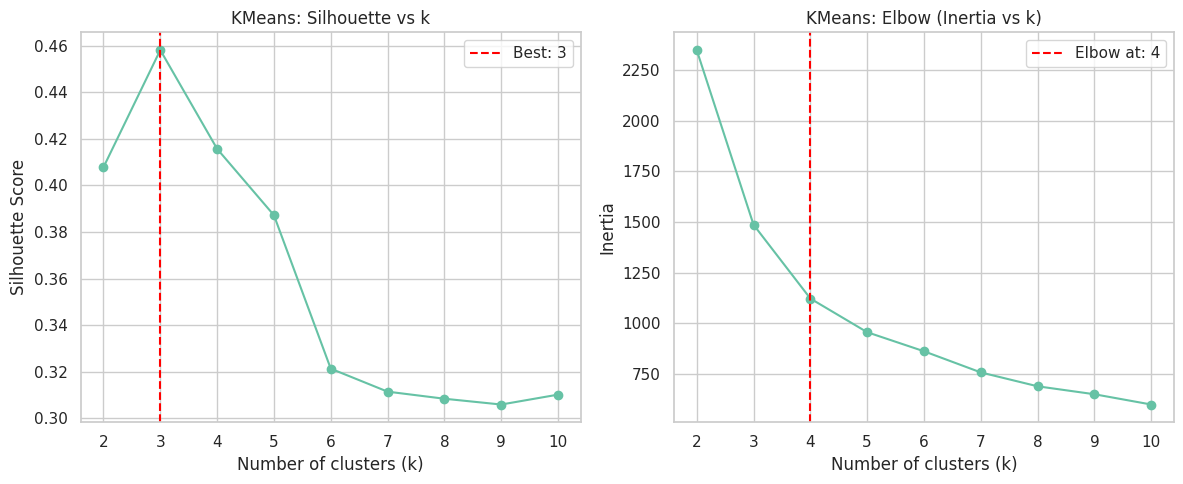

KMeans optimal elbow k: 4
KMeans optimal silhouette k: 3


In [ ]:
# Parameters
cluster_range = range(2, 11)
knee_args = {'curve': 'convex', 'direction': 'decreasing', 'S': 0.5}
data = df_pca

# ===KMeans optimization===
km_results = find_optimal_clusters_kmeans(data, cluster_range, **knee_args)
print("KMeans optimal elbow k:", km_results['optimal_elbow'])
print("KMeans optimal silhouette k:", km_results['optimal_silhouette'])

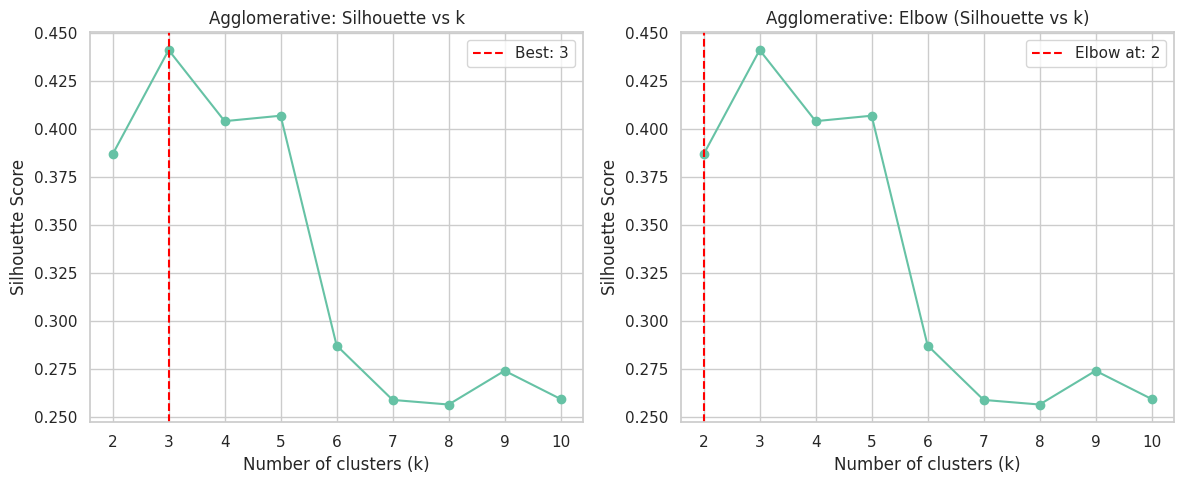

Agglomerative optimal elbow k: 2
Agglomerative optimal silhouette k: 3


In [ ]:
# Agglomerative optimization
agg_results = find_optimal_clusters_agglomerative(data, cluster_range, **knee_args)
print("Agglomerative optimal elbow k:", agg_results['optimal_elbow'])
print("Agglomerative optimal silhouette k:", agg_results['optimal_silhouette'])

Plotting DBSCAN eps grid


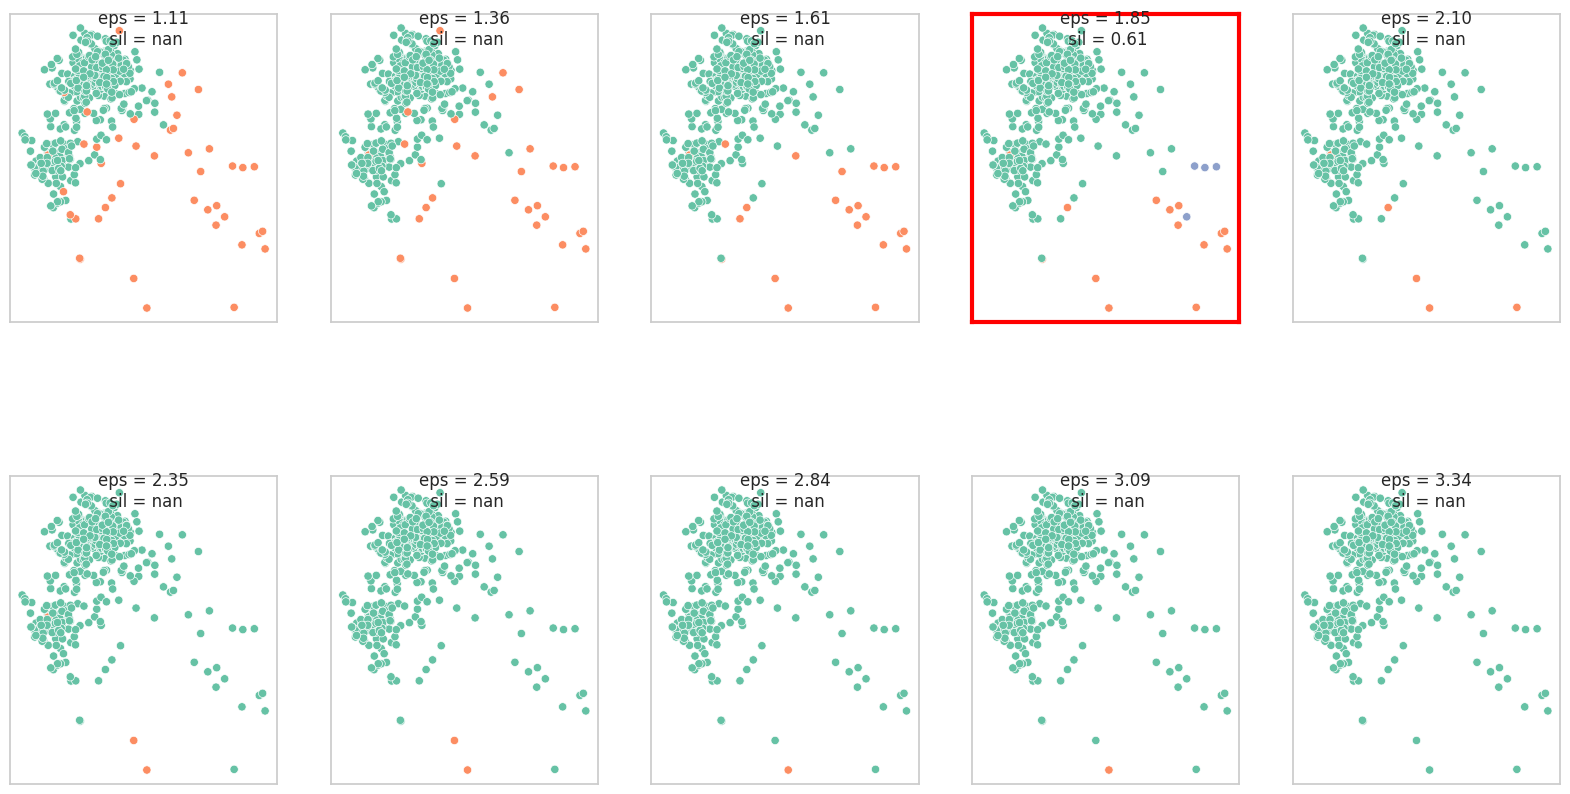

In [ ]:
# DBSCAN eps grid for each dataset
print(f"Plotting DBSCAN eps grid")
plot_dbscan_eps_grid_adaptive(data)

In [ ]:
# Final Evaluation for Clustering in PCA Embedding Space
# Optimal parameters
eps_pca = 1.85
kmeans_k_pca = 3
agg_k_pca = 3

# Compute clustering labels
labels_dbscan_pca = DBSCAN(eps=eps_pca, min_samples=5).fit_predict(df_pca)
labels_kmeans_pca = KMeans(n_clusters=kmeans_k_pca, random_state=0).fit_predict(df_pca)
labels_agg_pca = AgglomerativeClustering(n_clusters=agg_k_pca).fit_predict(df_pca)

# Store all results in a dictionary
clustering_results_pca = {
    "DBSCAN": labels_dbscan_pca,
    "KMeans": labels_kmeans_pca,
    "Agglomerative": labels_agg_pca
}

# Apply evaluation using DA labels as ground truth
df_results = evaluate_clustering_metrics(
    data_name="PCA",
    data=df_pca,
    clustering_results=clustering_results_pca,
    df_results=df_results,
    true_labels=data_scaled['DA'].values  # assumes df contains the DA column
)

# Show updated results
plot_clustering_in_3D(df_pca, clustering_results_pca, title_prefix="PCA")
df_results.query("embedding == 'PCA'")

embedding         method  n_clusters  silhouette  calinski_harabasz  \
0       PCA         DBSCAN           2        0.61              40.10   
1       PCA         KMeans           3        0.46             290.48   
2       PCA  Agglomerative           3        0.44             269.80   

   davies_bouldin  adjusted_rand  adjusted_mutual_info  
0            0.41           0.00                  0.00  
1            0.83           0.29                  0.35  
2            0.89           0.40                  0.41

## Clustering of t-SNE space

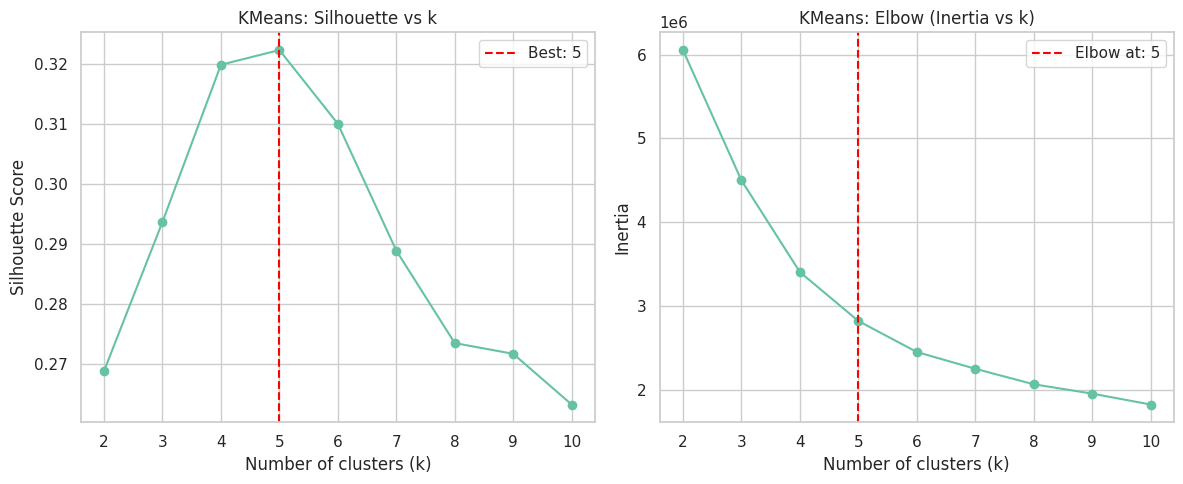

KMeans optimal elbow k: 5
KMeans optimal silhouette k: 5


In [ ]:
# Parameters
cluster_range = range(2, 11)
knee_args = {'curve': 'convex', 'direction': 'decreasing', 'S': 0.5}
data = df_tsne

# ===t-SNE optimization===
km_results = find_optimal_clusters_kmeans(data, cluster_range, **knee_args)
print("KMeans optimal elbow k:", km_results['optimal_elbow'])
print("KMeans optimal silhouette k:", km_results['optimal_silhouette'])

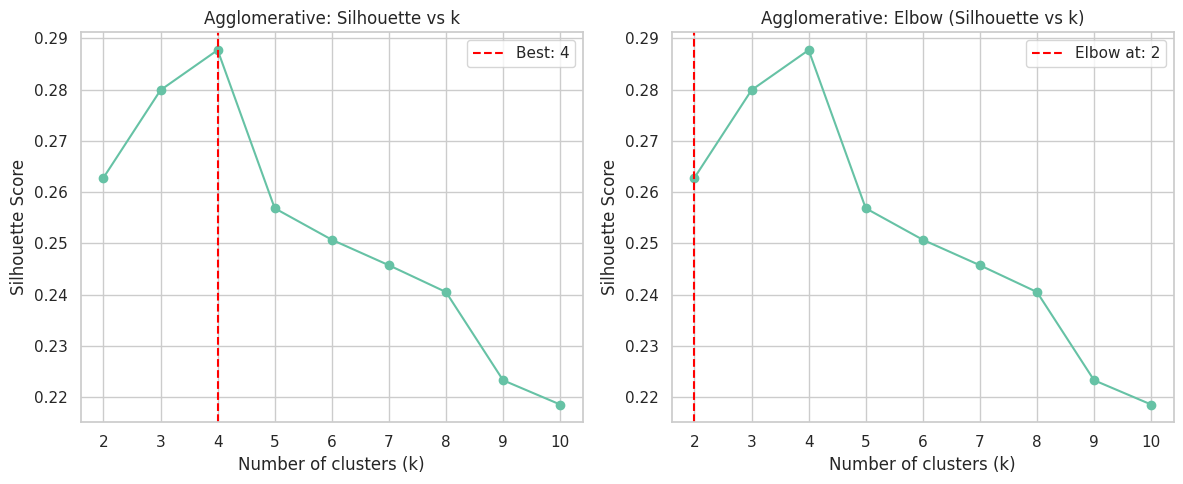

Agglomerative optimal elbow k: 2
Agglomerative optimal silhouette k: 4


In [ ]:
# Agglomerative optimization
agg_results = find_optimal_clusters_agglomerative(data, cluster_range, **knee_args)
print("Agglomerative optimal elbow k:", agg_results['optimal_elbow'])
print("Agglomerative optimal silhouette k:", agg_results['optimal_silhouette'])

Plotting DBSCAN eps grid


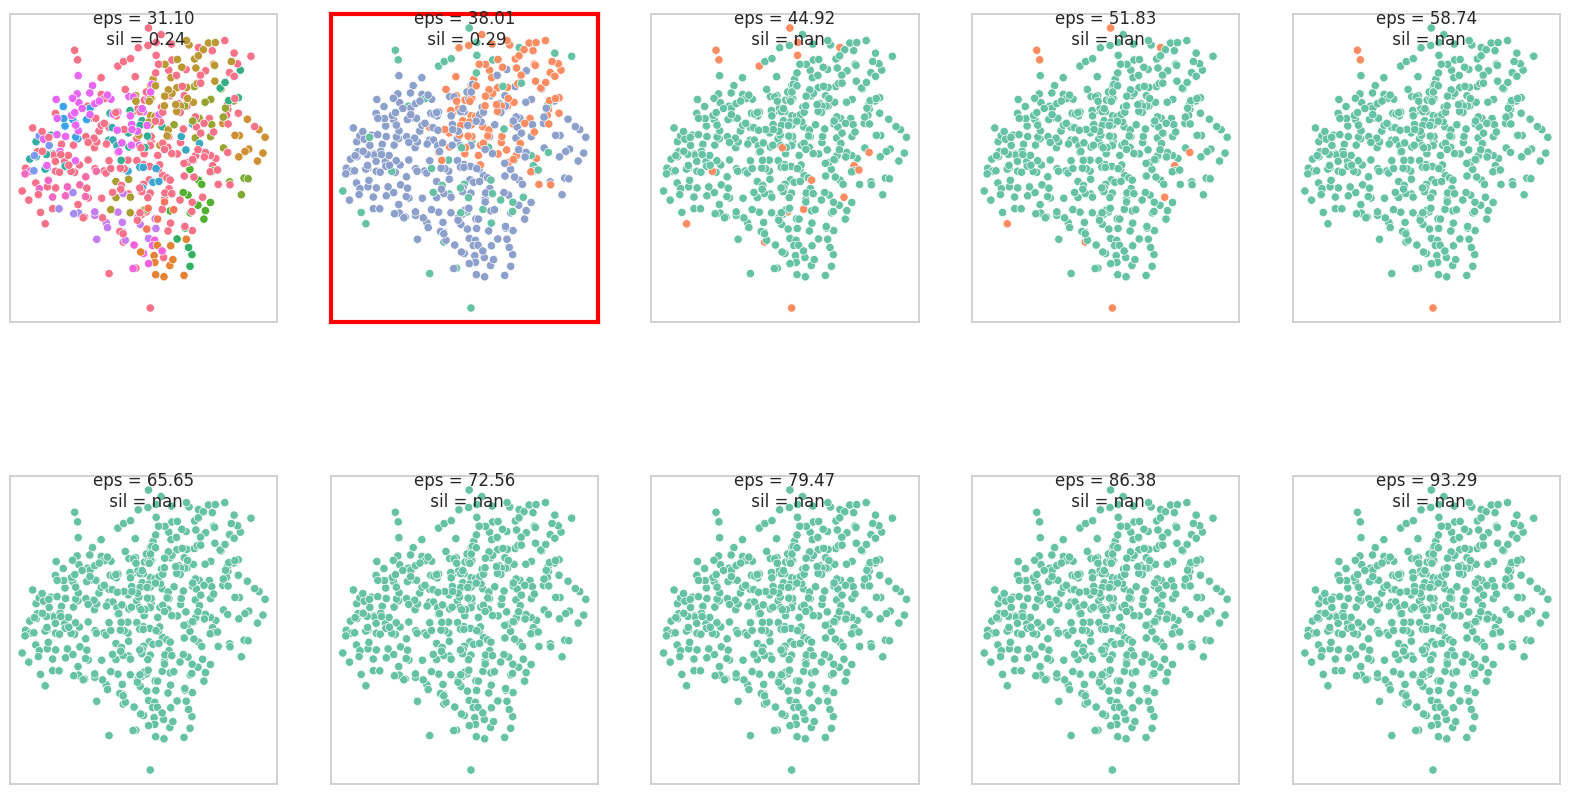

In [ ]:
# DBSCAN eps grid for each dataset
print(f"Plotting DBSCAN eps grid")
plot_dbscan_eps_grid_adaptive(data)

In [ ]:
# Final Evaluation for Clustering in t-SNE Embedding Space
# Optimal parameters
eps_tsne = 33.23
kmeans_k_tsne = 4
agg_k_tsne = 4

# Compute clustering labels
labels_dbscan_tsne = DBSCAN(eps=eps_tsne, min_samples=5).fit_predict(data)
labels_kmeans_tsne = KMeans(n_clusters=kmeans_k_tsne, random_state=0).fit_predict(data)
labels_agg_tsne = AgglomerativeClustering(n_clusters=agg_k_tsne).fit_predict(data)

# Store all results in a dictionary
clustering_results_tsne = {
    "DBSCAN": labels_dbscan_tsne,
    "KMeans": labels_kmeans_tsne,
    "Agglomerative": labels_agg_tsne
}

# Apply evaluation using DA labels as ground truth
df_results = evaluate_clustering_metrics(
    data_name="t-SNE",
    data=df_tsne,
    clustering_results=clustering_results_tsne,
    df_results=df_results,
    true_labels=data_scaled['DA'].values  # assumes df contains the DA column
)

# Show updated results
plot_clustering_in_3D(data, clustering_results_tsne, title_prefix="t-SNE")
df_results.query("embedding == 't-SNE'")

embedding         method  n_clusters  silhouette  calinski_harabasz  \
3     t-SNE         DBSCAN          12       -0.13          31.620001   
4     t-SNE         KMeans           4        0.32         224.009995   
5     t-SNE  Agglomerative           4        0.29         201.250000   

   davies_bouldin  adjusted_rand  adjusted_mutual_info  
3            1.07           0.58                  0.61  
4            1.03           0.54                  0.48  
5            1.07           0.40                  0.41

## Clustering of UMAP space

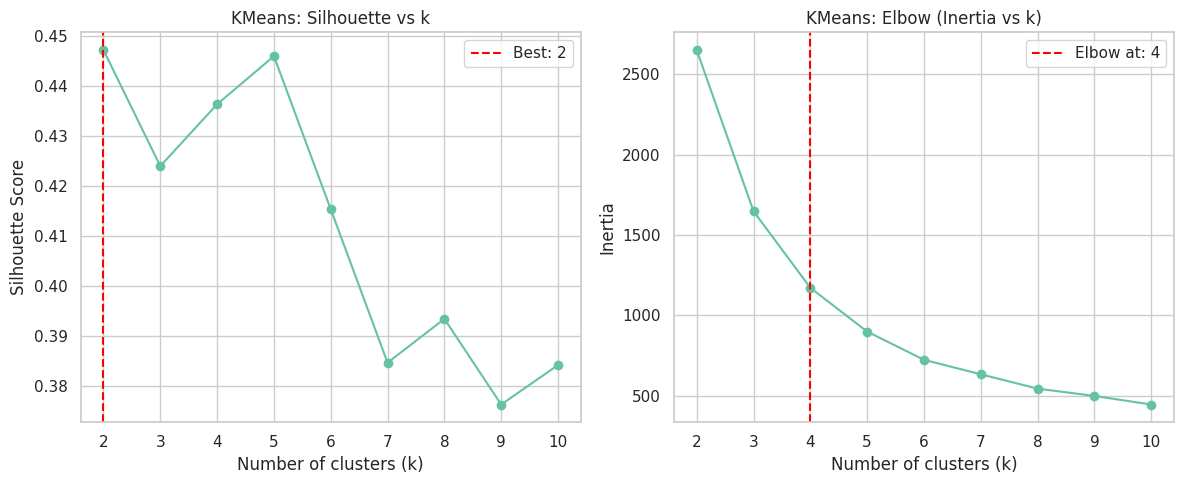

KMeans optimal elbow k: 4
KMeans optimal silhouette k: 2


In [ ]:
# Parameters
cluster_range = range(2, 11)
knee_args = {'curve': 'convex', 'direction': 'decreasing', 'S': 0.2}
data = df_umap

# ===UMAP optimization===
km_results = find_optimal_clusters_kmeans(data, cluster_range, **knee_args)
print("KMeans optimal elbow k:", km_results['optimal_elbow'])
print("KMeans optimal silhouette k:", km_results['optimal_silhouette'])

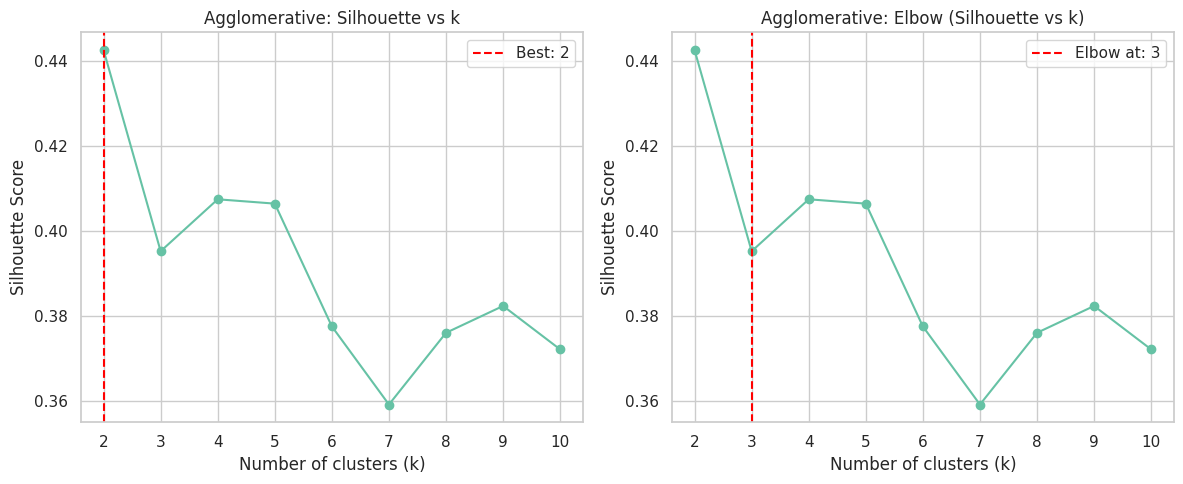

Agglomerative optimal elbow k: 3
Agglomerative optimal silhouette k: 2


In [ ]:
# Agglomerative optimization
agg_results = find_optimal_clusters_agglomerative(data, cluster_range, **knee_args)
print("Agglomerative optimal elbow k:", agg_results['optimal_elbow'])
print("Agglomerative optimal silhouette k:", agg_results['optimal_silhouette'])

Plotting DBSCAN eps grid


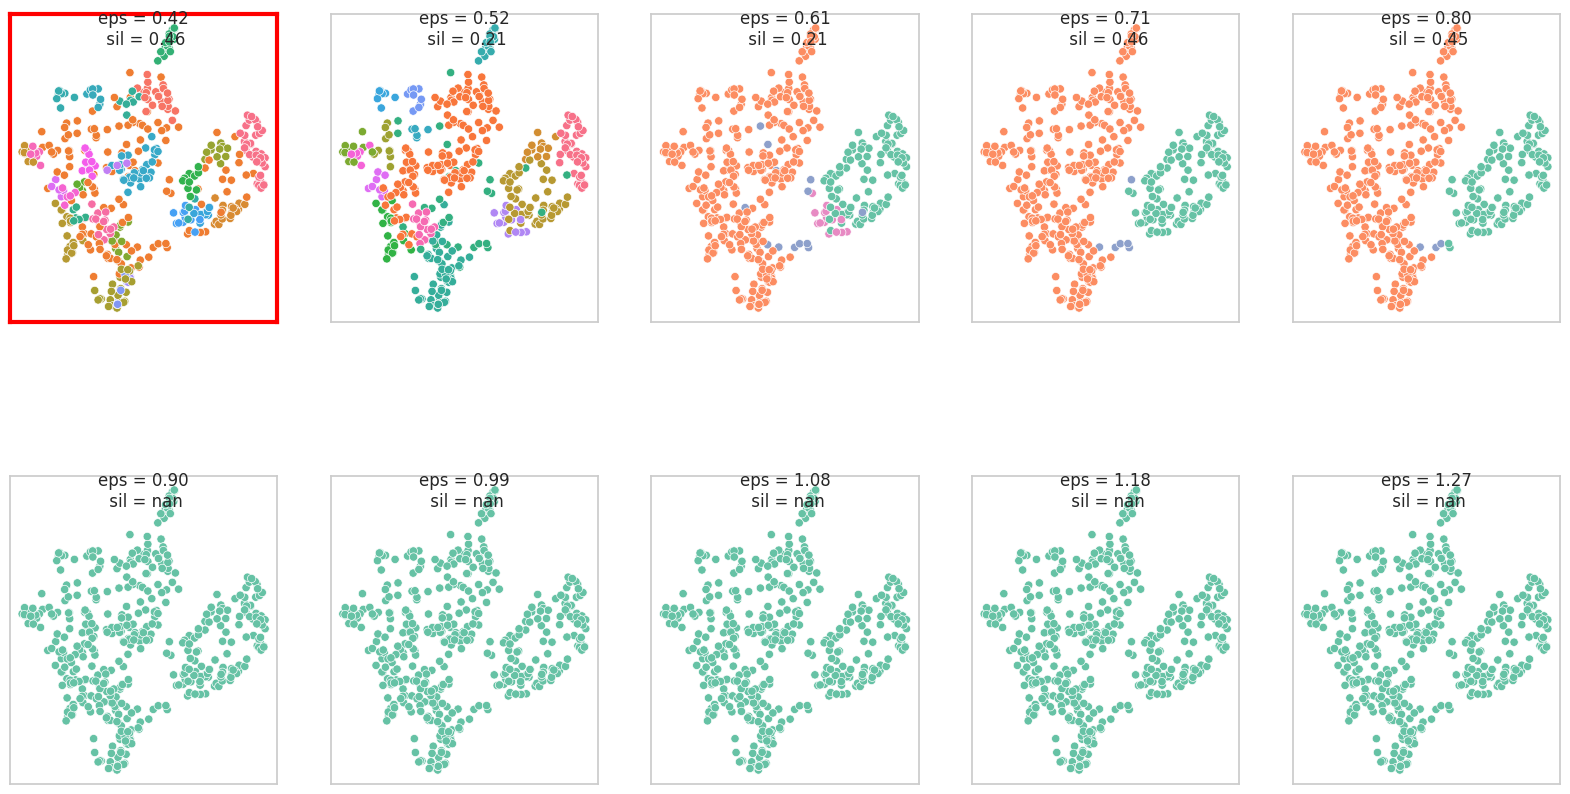

In [ ]:
# DBSCAN eps grid for each dataset
print(f"Plotting DBSCAN eps grid")
plot_dbscan_eps_grid_adaptive(data)

In [ ]:
# Final Evaluation for Clustering in UMAP Embedding Space
# Optimal parameters
eps_umap = 0.81
kmeans_k_umap = 3
agg_k_umap = 3

# Compute clustering labels
labels_dbscan_umap = DBSCAN(eps=eps_umap, min_samples=5).fit_predict(data)
labels_kmeans_umap = KMeans(n_clusters=kmeans_k_umap, random_state=0).fit_predict(data)
labels_agg_umap = AgglomerativeClustering(n_clusters=agg_k_umap).fit_predict(data)

# Store all results in a dictionary
clustering_results_umap = {
    "DBSCAN": labels_dbscan_umap,
    "KMeans": labels_kmeans_umap,
    "Agglomerative": labels_agg_umap
}

# Apply evaluation using DA labels as ground truth
df_results = evaluate_clustering_metrics(
    data_name="UMAP",
    data=df_umap,
    clustering_results=clustering_results_umap,
    df_results=df_results,
    true_labels=data_scaled['DA'].values  # assumes df contains the DA column
)

# Show updated results
plot_clustering_in_3D(data, clustering_results_umap, title_prefix="UMAP")
df_results.query("embedding == 'UMAP'")

embedding         method  n_clusters  silhouette  calinski_harabasz  \
6      UMAP         DBSCAN           2        0.45         381.519989   
7      UMAP         KMeans           3        0.42         444.140015   
8      UMAP  Agglomerative           3        0.40         396.019989   

   davies_bouldin  adjusted_rand  adjusted_mutual_info  
6            0.81           0.56                  0.54  
7            0.92           0.54                  0.48  
8            0.92           0.57                  0.52

# Selecting the Optimal Clustering Strategy

Clustering performance was assessed using a combination of internal and external validation metrics. To compare clustering quality across multiple algorithms and dimensionality reduction methods, all metrics were normalized to a 0–1 scale, and the Davies-Bouldin index was inverted due to its inverse interpretability. A composite score was calculated by averaging the five metrics, allowing for an objective ranking of all clustering outcomes. This strategy balances structure quality in latent space and biological consistency with ground truth dopaminergic neuron labels.

📊 Clustering Evaluation Metrics Explained
Each clustering result is evaluated using both internal and external metrics:

🟢 Internal metrics (do not require ground truth labels):
Silhouette Score:
Measures how similar each point is to its own cluster vs. other clusters.
Ranges from -1 to 1. Higher is better.

Calinski-Harabasz Index:
Ratio of between-cluster dispersion to within-cluster dispersion.
Higher values indicate better defined clusters.

Davies-Bouldin Index:
Measures average similarity between each cluster and its most similar one.
Lower values are better.

🔵 External metrics (require known labels):
These metrics are only calculated where ground truth labels are known (DA = 0 or 1).

Adjusted Rand Index (ARI):
Measures agreement between predicted clusters and true classes, adjusted for chance.
1.0 = perfect match, 0 = random, negative = worse than random.

Adjusted Mutual Information (AMI):
Measures mutual information between predicted clusters and true labels, normalized and adjusted for chance.
Also ranges from 0 to 1, where 1 is perfect alignment.

Labels marked as DA = 2 (unlabeled/unknown) are excluded from ARI and AMI computations.

In [ ]:
df_norm = df_results.copy()

# Normalize calinski_harabasz and davies_bouldin metrics to [0, 1]
for col in ['calinski_harabasz', 'davies_bouldin']:
    for emb in df_norm['embedding'].unique():
        mask = (df_norm['embedding'] == emb) & (df_norm[col].notna())
        values = df_norm.loc[mask, col]

        if col == 'davies_bouldin':
            values = 1 - values  # Invert Davies-Bouldin score before normalization since lower is better

        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(values.values.reshape(-1, 1)).flatten()

        df_norm.loc[mask, col] = scaled

# Compute internal and external scores using skipna=True
df_norm['internal_score'] = df_norm[['silhouette', 'calinski_harabasz']].mean(axis=1, skipna=True)
df_norm['external_score'] = df_norm[['adjusted_rand', 'adjusted_mutual_info']].mean(axis=1, skipna=True)
df_norm['total_score'] = df_norm[['internal_score', 'external_score']].mean(axis=1, skipna=True)

# Show full table with highlighting
cols_scores = ['internal_score', 'external_score', 'total_score']
all_cols = ['embedding', 'method', 'n_clusters',
            'silhouette', 'calinski_harabasz', 'davies_bouldin',
            'adjusted_rand', 'adjusted_mutual_info'] + cols_scores

styled = df_norm[all_cols].style.format(precision=3)
styled = styled.highlight_max(subset=['internal_score', 'external_score'], color='grey')
styled = styled.highlight_max(subset=['total_score'], color='blue')

print("\n*** Clustering Resulsts ***\n")
styled







*** Clustering Resulsts ***



In [ ]:
### Visual comparison: Bubble chart of clustering strategies
import plotly.express as px

# Load and prepare results
df_valid = df_norm.copy().dropna().round(2)
df_valid['combination'] = df_valid['embedding'] + '-' + df_valid['method']

# Bubble chart: Internal vs External with Total Score as size
bubble_fig = px.scatter(
    df_valid,
    x='internal_score', y='external_score',
    size=df_valid['total_score'].abs(), # Use absolute value for size
    color='combination',
    hover_name='combination',
    title='Clustering Performance: Bubble Chart by Score Composition',
    size_max=40,
    color_discrete_sequence=px.colors.qualitative.Bold
)

bubble_fig.update_layout(
    height=500,
    width=900,
    xaxis=dict(range=[0, 1], showgrid=True, gridcolor='lightgrey', gridwidth=0.5),
    yaxis=dict(range=[-0.2, 0.8], showgrid=True, gridcolor='lightgrey', gridwidth=1,
               zeroline=True, zerolinecolor='lightgrey', zerolinewidth=2),
    xaxis_title='Internal Score',
    yaxis_title='External Score',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14),
    legend_title_text='Combination'
)
bubble_fig.show()

#### Assessing DA information structure in the best clustering outcome

Based on the clustering performance metrics, the best results were obtained using **UMAP with KMeans**, showing a significant correspondence with the DA labels. This combination provides the most reliable clustering for identifying dopaminergic neurons.

We analyze the correspondence between cluster assignment and dopaminergic identity (DA = 0 or 1) for the best performing embedding + clustering combination. A contingency matrix and chi-squared test are used to evaluate whether clusters reflect meaningful DA/non-DA separation.
The chi-squared test evaluates whether there is a significant association between the clusters and the known dopaminergic (DA) labels, helping us determine how well the clusters correspond to biological categories

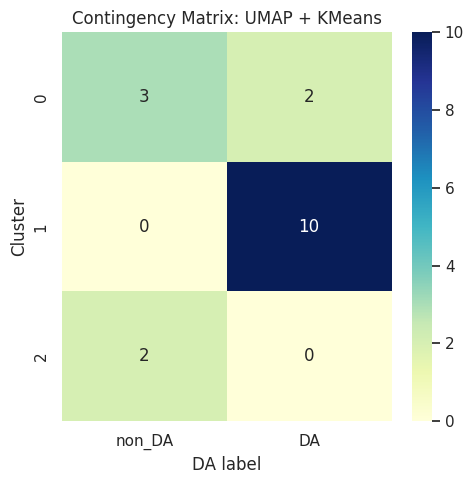


Chi-squared test: χ² = 11.22, p = 0.0037, dof = 2
→ The association between cluster assignment and DA identity is statistically significant.


In [ ]:
import scipy.stats as stats

# Get best performing clustering combination
df_best = df_valid.sort_values(by='total_score', ascending=False).iloc[0]
best_emb = df_best['embedding']
best_method = df_best['method']
labels = data_scaled['DA']

# Keep only DA = 0 (non-DA) and DA = 1 (DA) labels
mask_known = labels.isin([0, 1])
true_labels = labels[mask_known].replace({0: 'non_DA', 1: 'DA'})

# Select cluster assignments from the best embedding and method
clustering_sources = {
    'UMAP': clustering_results_umap,
    'PCA': clustering_results_pca,
    't-SNE': clustering_results_tsne
}
best_labels = clustering_sources[best_emb][best_method][mask_known]

# Compute contingency matrix and plot it as a heatmap
contingency = pd.crosstab(best_labels, true_labels, rownames=['Cluster'], colnames=['DA'])

plt.figure(figsize=(5, 5))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f"Contingency Matrix: {best_emb} + {best_method}")
plt.xlabel("DA label")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

# Chi-squared test of independence
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-squared test: χ² = {chi2:.2f}, p = {p_val:.4f}, dof = {dof}")
if p_val < 0.05:
    print("→ The association between cluster assignment and DA identity is statistically significant.")
else:
    print("→ No statistically significant association found between cluster assignment and DA identity.")


aqui justificar el metodo de embeddig/clustering elegido segun:
* Maximiza internal_score y external_score.
* Genera clusters bien definidos (alta silhouette, bajo DB).
* Se alinea con la realidad biológica (alta proporción de DA en clusters específicos).
* Tiene consistencia visual y estadística.

y tambien con los datos de la tabla que conteingencia, dado que los clusters generados espontáneamente (no supervisados) tienen relación con una variable biológica conocida (los teue labels conseguidos a partir de l experiemnto con apomorfina)

Luego, extender la codificacion del cluster al que pertenece cada neurona en el dataframe data_scaled. ademas agregar una columna que diga si son DA o no segun el cluster al que asociaron que a su vez engoba la mayor cantidad de neuronas putativas dopaminergicas etiquetadas con apormofina

In [ ]:
cluster_labels = clustering_sources[best_emb][best_method]
data_scaled['Cluster'] = cluster_labels


In [ ]:
# Paso 1: Filtrar neuronas con etiquetas reales (DA = 0 o 1)
mask_known = data_scaled['DA'].isin([0, 1])
cluster_con_DA_reales = data_scaled[mask_known].groupby('Cluster')['DA'].sum()

# Paso 2: Determinar el cluster con más neuronas DA reales
cluster_mas_DA = cluster_con_DA_reales.idxmax()

# Paso 3: Crear nueva columna con clasificación predicha
data_scaled['DA_predicha'] = (data_scaled['Cluster'] == cluster_mas_DA).astype(int)


TypeError: category type does not support sum operations

HASTA AQUI ESTA EL CODIGO DEPURADO.

DESDE AQUI ES EL CODIGO VIEJO

Puedo usar una matriz de confusion para ver la correspondencia entre la etiqueta de estructura encodeada original y el numero de cluster asignado por cada algoritmo

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
# kmeans_labels_pca, hdbscan_labels_pca, agglomerative_labels_pca /umap
conf_matrix = confusion_matrix(y_array.astype(int), kmeans_labels_umap)

# Graficar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiquetas Clustering')
plt.ylabel('Etiquetas Originales')
plt.title('Matriz de Confusión')
plt.show()


# Nueva sección

# Nueva sección

### Veo los clusters conformados para PCA y UMAP y su correlacion con lo datos de Apomorfina

In [ ]:
#selecciono y predigo a partir de lo datos de Apomorfina
#X_DA = df_datos.query("DA !=2")[features].dropna()
#VOLVER A LA LINEA ANTERIOR, esto es temp para no ver los no DA
X_DA = df_datos.query("DA ==1")[features].dropna()
y_DA = df_datos.loc[X_DA.index, 'DA']

X_DA_norm = scaler.transform(X_DA)
pca_X_DA  = pca.transform(X_DA_norm)
umap_X_DA = umap_model.transform(X_DA_norm)

In [ ]:
def graph_pred_orig(x_pred, y_pred, x_orig, y_orig, titulo):
  #x_pred y x_orig son array de numpy
  # y_pred y y_orig son serie de pandas

  #  metrica1_pred = x_pred[:, 0]
  #  metrica2_pred = x_pred[:, 1]
  #  metrica3_pred = x_pred[:, 2]

    #--- FIG 1
    df_temp = pd.DataFrame(x_pred, index=y_pred.index, columns=['pc1','pc2','pc3'])
    df_temp['label'] = y_pred.values.astype(object)
    df_temp['ID'] = y_pred.index

    fig = px.scatter_3d(df_temp, x='pc1', y='pc2', z='pc3', color='label',
                        labels={'metrica1': 'pc1', 'metrica2': 'pc2', 'metrica3': 'pc3'},
                        title=titulo,
                        custom_data=['ID'],
                        width=600, height=600)

    fig.update_traces(marker=dict(size=5, line=dict(color='black', width=0.1)),
                      textposition='top center',
                      hovertemplate="ID_neurona: %{customdata}")

    # ---FIG 2
    #metrica1_orig = x_orig[:, 0]
    #metrica2_orig = x_orig[:, 1]
    #metrica3_orig = x_orig[:, 2]
    df_temp2 = pd.DataFrame(x_orig, index=y_orig.index, columns=['pc1','pc2','pc3'])
    df_temp2['DA'] = y_orig.values.astype(object)
    df_temp2['ID'] = y_orig.index
    df_temp2['Marker'] = df_temp2['DA'].map({0: "circle-open", 1: "x"})


    fig2 = px.scatter_3d(df_temp2, x='pc1', y='pc2', z='pc3',
                         labels={'metrica1_pred': 'pc1', 'metrica2': 'pc2', 'metrica3_pred': 'pc3'},
                         width=600, height=600,
                         opacity=1, color_discrete_sequence=['black'],
                         custom_data=['ID'])

    fig2.update_traces(marker=dict(size=3, symbol=df_temp2['Marker'], color='black'),
                       textposition='top center',
                       hovertemplate="ID_neurona: %{customdata}")

   # Agregar leyenda personalizada
   # fig2.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=13, symbol="circle", color='black'), name='no DA'))
   # fig2.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=13, symbol="x", color='black'), name='DA'))

    # combinar ambos graficos
    fig.add_traces(fig2.data)





    # Configurar el diseño del gráfico
# Update chart looks
    fig.update_layout(
        scene_camera=dict(up=dict(x=0, y=0, z=1),
                          center=dict(x=0, y=0, z=-0.1),
                          eye=dict(x=1.5, y=-1.4, z=0.5)),
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(xaxis=dict(backgroundcolor='white',
                              color='black',
                              gridcolor='#f0f0f0',
                              title_font=dict(size=14),
                              tickfont=dict(size=12),
                             ),
                   yaxis=dict(backgroundcolor='white',
                              color='black',
                              gridcolor='#f0f0f0',
                              title_font=dict(size=14),
                              tickfont=dict(size=12),
                              ),
                   zaxis=dict(backgroundcolor='lightgrey',
                              color='black',
                              gridcolor='#f0f0f0',
                              title_font=dict(size=14),
                              tickfont=dict(size=12),
                             )),
        showlegend=True,
        legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5)
    )

    # Configurar tamaño de las etiquetas de los ejes
    scene=dict(xaxis=dict(title_font=dict(size=14)),
               yaxis=dict(title_font=dict(size=14)),
               zaxis=dict(title_font=dict(size=14))),
    fig.show()


In [ ]:
graph_pred_orig(df_pca, pd.Series(kmeans_labels_pca, index=X.index),
                pca_X_DA,y_DA.to_frame(),'PCA - K-Means Clustering')
graph_pred_orig(df_pca,pd.Series(dbscan_labels_pca, index=X.index),
                pca_X_DA,y_DA.to_frame(),'PCA - DBSCAN Clustering')
graph_pred_orig(df_pca,pd.Series(agglomerative_labels_pca, index=X.index),
                pca_X_DA,y_DA.to_frame(),'PCA - Agglomerative Clustering')

graph_pred_orig(df_umap,pd.Series(kmeans_labels_umap, index=X.index),
                umap_X_DA,y_DA.to_frame(),'UMAP - K-Means Clustering')
graph_pred_orig(df_umap,pd.Series(dbscan_labels_umap, index=X.index),
                umap_X_DA,y_DA.to_frame(),'UMAP - DBSCAN Clustering')
graph_pred_orig(df_umap,pd.Series(agglomerative_labels_umap, index=X.index),
                umap_X_DA,y_DA.to_frame(),'UMAP - Agglomerative Clustering')

## Determinacion de los ID_neurona identificadas como DA
Se determina a partir del cluster en el que convergen mayor cantidad de neuronas que responden a Apomorfina

El dataframe original con los datos de las neuronas es df_datos que esta filtrado por:
* VTA y SNc de calidad 1/2
* se eliminaron las wf raras

X es el conjunto de datos con todas las neuronas DA=0,1,2 que se clasificaron usando PCA/UMAP y KMEANS/DBSACAN
y es la etiqueta original DA para las neuronas de X
- kmeans_label_pca, dbscan_label_pca, kmeans_label_umap, dbscan_label_umap son los clusters predichos para X


X_DA es el conjunto de neuronas con DA = 0,1 que se transformaron al mismo espacio de dimension reducida PCA/KMEANS y se verifico en que clusteres caian
y_DA es la etiqueta original DA para las neuronas de X_DA

Por lo tanto, X contiene a las neuronas de X_DA

In [ ]:
#ID_clu_0 = X.index[np.where(kmeans_labels_pca==0)].to_list() #posibles DA
#ID_clu_1 = X.index[np.where(kmeans_labels_pca==1)].to_list()
#ID_clu_2 = X.index[np.where(kmeans_labels_pca==2)].to_list()
#ID_clu_3 = X.index[np.where(kmeans_labels_pca==3)].to_list()

#genero una columna en el dataframe de los datos de SNC y VTA con la etiqueta de
# los clusters identificados. Clu = 0 posible DA

#PCA - KMEANS
#labels_clu = pd.Series(kmeans_labels_pca, index=X.index)
#df_datos['cluster'] = df_datos.index.map(labels_clu).astype('object')

#UMAP - DBSCAN
labels_clu = pd.Series(kmeans_labels_umap, index=X.index)
df_datos['cluster'] = df_datos.index.map(labels_clu).astype('object')

#reemplazo los valores de cluster separados a uno nuevo
df_datos['cluster'] = df_datos['cluster'].replace([1,4,3], 1).astype(object)

#reemplazo los valores de cluster restantes como otro no_DA
df_datos['cluster'] = df_datos['cluster'].apply(lambda x: 1 if x == 1 else 0).astype(object)

#UMAP - Agglomerative
#labels_clu = pd.Series(agglomerative_labels_umap, index=X.index)
#df_datos['cluster'] = df_datos.index.map(labels_clu).astype('object')

#parece andar bien dbscan_pca

### Verificacion de las nueronas identificadas en el cluster 0 para las diferentes features

In [ ]:
df_graph = df_datos#.query("calidad == 1 & estructura == 'SNc'")

metrica1 = 'frec_dominante'
metrica3 = 'peak_ratio_nuevo'
metrica2 = 'firing_rate'

# Mapeo de colores para las categorías de la columna 'DA'
color_map = {0: 'red', 1: 'blue', 2: 'gray'}

fig = px.scatter_3d(df_graph, x=metrica1, y=metrica2, z=metrica3, color='cluster',
                    labels={'metrica1': metrica1, 'metrica2': metrica2, 'metrica3': metrica3},
                    title='Relación entre Métrica 1, Métrica 2 y Métrica 3',
                    width=600, height=600)

fig.update_traces(marker=dict(size=5, line=dict(color='black', width=0.1)), textposition='top center')#,
                  #hovertemplate="ID_neurona: %{customdata}")

df_temp = y_DA.to_frame()
df_temp['Marker'] = df_temp['DA'].map({0: "circle-open", 1: "x"})

#elimino los valores 0 - no_DA (TEMPORAL)

fig2 = px.scatter_3d(X_DA, x=metrica1, y=metrica2, z=metrica3,
                     labels={'metrica1_pred': 'Frec dominante', 'metrica2': 'Peak Ratio', 'Firing rate': metrica3},
                     width=600, height=600,
                     opacity=1, color_discrete_sequence=['black'])

fig2.update_traces(marker=dict(size=3, symbol=df_temp['Marker'], color='black'))

# combinar ambos graficos
fig.add_traces(fig2.data)

# Update chart looks
fig.update_layout(
    scene_camera=dict(up=dict(x=0, y=0, z=1),
                      center=dict(x=0, y=0, z=-0.1),
                      eye=dict(x=1.5, y=-1.4, z=0.5)),
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(xaxis=dict(backgroundcolor='white',
                          color='black',
                          gridcolor='#f0f0f0',
                          title_font=dict(size=13),
                          tickfont=dict(size=10),
                         ),
               yaxis=dict(backgroundcolor='white',
                          color='black',
                          gridcolor='#f0f0f0',
                          title_font=dict(size=13),
                          tickfont=dict(size=10),
                          ),
               zaxis=dict(backgroundcolor='lightgrey',
                          color='black',
                          gridcolor='#f0f0f0',
                          title_font=dict(size=13),
                          tickfont=dict(size=10),
                         )),
    showlegend=True,
    legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5)
)

fig.show()


### Exporto a un csv las neuronas identificadas
Exporto a un csv las nueronas identificadas. Exporto los siguientes datos:
- ID, rata, sesion, tetrodo, estructura, calidad, cluster

** **DA**:  0:no responde; 1:responde, 2:no incluida en experiemnto

** **calidad**: 1: buena calidad anatomica, 2: calidad anatomica no segura

** **cluster**: 2: putativa DA

Del total de nueronas(162):
responden Apo: 8
no respon Apo: 42
no exper  Apo: 112

---
**USANDO KMEANS (n=7) y UMAP**  ESTE VOY A USAR
```
Clasificadas por estructura
estructura  DA   cant
SNc         2     48
            0      7
            1      5
VTA         2     64
            0     35
            1      3

Total neuronas DA clasificadas por estructura (cluster 2)
SNc        35 de 60 (calidad 1, 16 de 24)
VTA        43 de 102 (calidad 1, 18 de 36)
```

---
 **Usando DBSCAN y UMAP**

```
Clasificadas por estructura
estructura  DA   cant
SNc         2     48
            0      7
            1      5
VTA         2     64
            0     35
            1      3

Total neuronas DA clasificadas por estructura (cluster 2)
SNc        26 de 60
VTA        24 de 103

```
Otra opcion, usar UMAP con kmeans con 7 cluster y quedarse con los clusters 1,4 y 3



Configurar Rclone para exportar los datos a Dropbox

In [ ]:
#! curl https://rclone.org/install.sh | sudo bash

In [ ]:
#!rclone config

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_datos_export = df_datos.dropna(subset='cluster')
nombre_archivo_csv = '/content/drive/MyDrive/Tesis_doctoral/Bases_de_datos/clusters_DA.csv'
df_datos_export.to_csv(nombre_archivo_csv, index=False)



In [ ]:
!pip install svgwrite

In [ ]:
#exporto las imagenes
# Importar la función io de plotly
from plotly import io

# Resto del código para crear la figura 'fig'

# Exportar la figura como un archivo SVG
io.write_image(fig, '/content/drive/MyDrive/Tesis_doctoral/Bases_de_datos/clusters_DA_componentes.png')




# CODIGO VIEJO - NO SIRVE EN ESTE ANALISIS

## Separacion de los datos en funcion de las estructuras (VTA o  SNc)

Separación del Dataset en Funcion d las estructuras circundates a la cual se quiere identificar.
Para VTA:
- VTA
- VTAR: parte rostral de VTA
- VTAcl: zona contralateral de VTA
- rafe
- RMC: nucleo rojo
- PR: prerubral nucleus
- dpme: nucleos profundos mesencefalicos
- lm: lemnisco medial

Para SNc:
- SNc
- SNL: substancia nigra lateral
- SNr: substancia nigra reticulada
- zi: zona incierta
- dpme: nucleos profundos mesencefalicos

Otra estructuras:
- Vli: nucelo ventral del talamo
- Reth: nucelo retrohetmoides


In [ ]:
# estructuras alrededor de VTA
estructuras_VTA = ['VTA','VTAR','VTAcl','RMC','PR','dpme','lm']

# estructuras alrededor de SNc
estructuras_SNc = ['SNc','SNL','SNr','zi','dpme']

# estructuras alrededor de CA1
estructuras_CA1 = ['CA1']

# otras estructuras
estructuras_otras = ['Vli','Reth','rafe']
#-------------------------------------

df_VTA = df[df['estructura'].isin(estructuras_VTA)]
df_SNc = df[df['estructura'].isin(estructuras_SNc)]
df_CA1 = df[df['estructura'].isin(estructuras_CA1)]
df_otras = df[df['estructura'].isin(estructuras_otras)]


In [ ]:
#de total de neurona, veo cuantas tengo de cada estructura (a priori).
df_VTA_tmp = df_VTA.groupby('estructura').count()['tetrodo'].reset_index()
df_VTA_tmp.rename(columns = {'tetrodo':'Cant_Clusters'}, inplace = True)

fig = px.pie(df_VTA_tmp, values = 'Cant_Clusters', names='estructura', title='Regiones anatómicas registradas circundates a VTA(a priori)',
             opacity = 0.85, hole = 0.5)
fig.show()


# Calculo la cant de registros de cada etiqueta en la columna 'estructura'
frecuencia_etiquetas = df_VTA['estructura'].value_counts().sort_values()

frecuencia_etiquetas.plot.barh()
plt.title('Frecuencia de las Etiquetas')
plt.xlabel('Frecuencia')
plt.ylabel('Etiquetas')
for i, v in enumerate(frecuencia_etiquetas):
    plt.text(v, i, str(v), color='black')
plt.show()

# Separacion de Neuronas DA de VTA

In [ ]:
# neuronas DA en VTA de calidad 1
df_DA_VTA = df_VTA.query("estructura == 'VTA' & DA == 1 & calidad == 1")
df_DA_VTA

## VTA

In [ ]:
df_temp = df_VTA.query("estructura == 'VTA' & calidad == 1 | calidad == 2")
df_temp['DA'] = df_temp['DA'].fillna(2).astype('object')
df_temp['peak_ratio'] = -df_temp['value_min'] / (-df_temp['value_min'] + df_temp['value_max_2'])
df_temp['slope_ratio'] = 1 - (df_temp['m_post'] / df_temp['m_pre'])
df_temp = df_temp.query("peak_ratio < 1.5").copy()
df_temp['DA_nuevo'] = np.where(df_temp['slope_ratio'] > 0.95, 1, np.where(df_temp['slope_ratio'] < 0.9, 0, 2))
df_temp['DA_nuevo'] = df_temp['DA_nuevo'].astype('object')

metrica1 = 'proporcion_energia'
metrica2 = 'frec_dominante'
metrica3 = 'peak_ratio'

# Mapeo de colores para las categorías de la columna 'DA'
color_map = {0: 'red', 1: 'blue', None: 'gray'}

fig = px.scatter_3d(df_temp, x=metrica1, y=metrica2, z=metrica3, color='DA_nuevo',
                    labels={'metrica1': metrica1, 'metrica2': metrica2, 'metrica3': metrica3},
                    title='Relación entre Métrica 1, Métrica 2 y Métrica 3',
                    width=1000, height=600,
                    color_discrete_map=color_map)

fig.update_traces(marker=dict(size=5))
fig.show()


## SNc

In [ ]:
df_temp2 = df.query("(estructura == 'SNc' | estructura == 'VTA') & (calidad == 1 )")
df_temp2['DA'] = df_temp2['DA'].fillna(2).astype('object')
df_temp2['peak_ratio'] = -df_temp2['value_min'] / (-df_temp2['value_min'] + df_temp2['value_max_1'])
df_temp2['slope_ratio'] = 1 - (df_temp2['m_post'] / df_temp2['m_pre'])
df_temp2 = df_temp2.query("peak_ratio < 1.5").copy()
df_temp2['DA_nuevo'] = np.where(df_temp2['slope_ratio'] > 0.9, 1, np.where(df_temp2['slope_ratio'] < 0.9, 0, 2))
df_temp2['DA_nuevo'] = df_temp2['DA_nuevo'].astype('object')
df_temp2['ID'] = df_temp2.index


metrica1 = 'proporcion_energia'
metrica2 = 'frec_dominante'
metrica3 = 'peak_ratio'

# Mapeo de colores para las categorías de la columna 'DA'
color_map = {0: 'red', 1: 'blue', None: 'gray'}

fig = px.scatter_3d(df_temp2, x=metrica1, y=metrica2, z=metrica3, color='DA',
                    labels={'metrica1': metrica1, 'metrica2': metrica2, 'metrica3': metrica3},
                    title='Relación entre Métrica 1, Métrica 2 y Métrica 3',
                    width=1000, height=600,
                    color_discrete_map=color_map,
                    custom_data=['ID'])

#fig.update_traces(marker=dict(size=5))
#fig.show()

fig.update_traces(marker=dict(size=5), textposition='top center',
                  hovertemplate="Índice: %{customdata}")  # Mostrar el índice al pasar el mouse sobre el punto

fig.show()

In [ ]:
metrica1 = 'proporcion_energia'
metrica2 = 'frec_dominante'
metrica3 = 'asimetria'
fig = px.scatter_3d(df_DA_VTA, x=metrica1 , y=metrica2, z=metrica3, color='estructura',
                    labels={'metrica1': metrica1, 'metrica2': metrica2, 'metrica3': metrica3},
                    title='Relación entre Métrica 1, Métrica 2 y Métrica 3',
                    width=1000, height=600)
fig.update_traces(marker=dict(size=5))
fig.show()


### Adecuacion de los datos y visualizacion de datos nulos

In [ ]:
#chequeo que los nombres de las estructuras esten bien
print(df.estructura.unique())

In [ ]:
#si hay alguno que no esta bien, lo puedo renombrar
df['estructura'] = df2['estructura'].replace('VTAcl','VTA')

Visualización de los datos nulos

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

## Adecuacion de los datos

Separación del Dataset en Funcion d las estructuras circundates a la cual se quiere identificar.
Para VTA:
- VTA
- VTAR: parte rostral de VTA
- VTAcl: zona contralateral de VTA
- rafe
- RMC: nucleo rojo
- PR: prerubral nucleus
- dpme: nucleos profundos mesencefalicos
- lm: lemnisco medial

Para SNc:
- SNc
- SNL: substancia nigra lateral
- SNr: substancia nigra reticulada
- zi: zona incierta
- dpme: nucleos profundos mesencefalicos

Otra estructuras:
- Vli: nucelo ventral del talamo
- Reth: nucelo retrohetmoides


### Descripción de las métricas


* 'mean_rate' --> firing rate medio
* 'std_rate' -->
* 'firing_rate'--> firing rate
* 'ISI_index'
El ISIindex compara la cantidad observada de intervalos interespiga (ISIs) por debajo de un umbral (ISI1) con la cantidad esperada de ISIs por debajo de un segundo umbral (ISI2). Proporciona una medida de la irregularidad de los patrones de actividad de disparo de una neurona.
ISIindex = 1 --> distribucion uniforme de los ISI
ISIindex < 1 --> indica una mayor regularidad en los patrones de disparo
ISIindex > 1 --> puede indicar una mayor variabilidad o irregularidad en los patrones de disparo

* 'ISI_ratio'
El ISIratio es la fracción de ISIs que están por debajo de ISI1 en relación con el número total de ISIs registrados.
Proporciona una medida de la proporción de ISIs cortos en los patrones de actividad de disparo.
ISIratio = 1 --> indica que todos los ISIs son menores o iguales a ISI1. Esto sugiere una alta densidad de ISIs cortos en los patrones de disparo de la neurona.
ISIratio ~= 0 --> ndica que casi no hay ISIs por debajo de ISI1. Esto sugiere una baja proporción de ISIs cortos en los patrones de disparo de la neurona.


* 'CV' --> medida de la dispersión en la distribución de ISI(Dayan & Abbott, 2001).
Cv = ~0 --> indica que los ISIs son muy consistentes y hay poca variabilidad en
   los intervalos entre las espigas.
   Esto podría sugerir una actividad neuronal rítmica o un patrón regular de espigas (predecible).
Cv > 0 --> indica una mayor variabilidad en los ISIs y una distribución más
   amplia de los intervalos entre las espigas.
   Esto puede indicar una mayor heterogeneidad en la actividad neuronal o la presencia de patrones irregulares de espigas
Cv ~= 1 --> se tendria un proceso de Poisson (spikes aleatorio a tasa
   constante).


* 'CV2'-->Coeficiente de variacion con respecto a las ventanas de tiempo adyacentes.
esta metrica considera la variación entre los ISIs en ventanas de tiempo adyacentes.
indica la proporción de variación en los ISIs en relación con su promedio
es útil para analizar patrones de variabilidad temporal específicos en la actividad neuronal.
Cv2 alto --> mayor variabilidad, actividad irregular, mas estocastica
Cv2 bajo --> menor variabilidad, actividad mas regular y predecible.


* 'peak_time_ccg'--> Tiempo del pico en el autocorrelograma
* 'potencia_tot' --> Potencia espectral Total del wf
* 'ancho_banda' --> Ancho de banda relativo a la freq dominante relativo
* 'frec_dominante' --> Frec dominante en el analisis espectral del waveform
* 'wf_invertida' --> 0/1 indica si la wf estaba invertida
* 'duracion' --> duracion del wf (mseg) a la 1/2 de la altura pico max - pico mi
* 'asimetria'
* 'dur_1max_min'
* 'dur_2max_min'
* 'pendiente_depol'
* 'pendiente_repol'
* 'proporcion_energia'

### Separacion de los datos en funcion de las estructuras a predecir - VTA

In [ ]:
#importo las librerias necesarias

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.semi_supervised import LabelPropagation

from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

#importo las librerias para las metricas para evaluar los clusters dado que tengo algunos datos etiquetados
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
#preparo los datos.
# estructuras alrededor de VTA
estructuras_VTA = ['VTA','VTAR','VTAcl','RMC','PR','rafe','dpme','lm']

df_VTA_def = df[df['estructura'].isin(estructuras_VTA)].query("type =='SU'")

# IMPORTANTE: seteo el ID_neurona como indice del DataFrame para poder identificarlas luego
df_VTA_def.set_index('ID_neurona', inplace=True)


## Adecuacion de los datos etiquetados y sin etiquetar
Genero un dataset de entrenamiento que tendra una mezcla de datos etiquetados y sin etiquetar. Luego de ajustado el modelo con ese train_dataset, voy a predecir las etiquetas de lso datos sin etiquetar.

**Importante:** las etiquetas de los datos sin etiquetar deben ser -1

In [ ]:
# uso la siguientes features - ELIMINO la estructura
features2 = ['firing_rate', 'ISI_ratio',
       'CV', 'frec_dominante', 'asimetria',
       'proporcion_energia']

features3 = ['mean_rate', 'firing_rate', 'ISI_peak_time', 'ISI_ratio',
       'CV', 'CV2', 'potencia_tot', 'frec_dominante', 'asimetria',
       'proporcion_energia']

features1 = ['ISI_peak_time', 'ISI_ratio', 'CV', 'frec_dominante', 'asimetria'] #elegidas luego de evaluar todas las features

features = ['duracion','asimetria','frec_dominante','proporcion_energia']

#codifico las etiquetas de las estructuras
lab_encoder = LabelEncoder()
lab_encoder.fit(df_VTA_def['estructura'])

# defino un scaler para normalizar los datos
#scaler2 = MinMaxScaler()
scaler = StandardScaler()

#Datos de Neuronas con estructuras para clasificar VTA, SU y de calidad 1 y sus etiquetas codificadas
#df_VTA_1 = df_VTA_def.query("clu_metric_error.isnull() & calidad == 1")
#labels_VTA_1 = lab_encoder.transform(df_VTA_def.query("clu_metric_error.isnull() & calidad == 1")['estructura'])
df_VTA_1 = df_VTA_def.query("calidad == 1").copy()
labels_VTA_1 = lab_encoder.transform(df_VTA_def.loc[df_VTA_1.index,'estructura'])

df_VTA_1.loc[:,'etiqueta_estructura'] = labels_VTA_1

# separo los datos a clasificar (calidad 2 y 3) y sus etiquetas "reales" codificadas
#df_VTA_2_3 = df_VTA_def.query("clu_metric_error.isnull() & calidad != 1")
#labels_VTA_2_3 = lab_encoder.transform(df_VTA_def.query("clu_metric_error.isnull() & calidad != 1")['estructura'])

df_VTA_2_3 = df_VTA_def.query("calidad != 1").copy()
labels_VTA_2_3 = lab_encoder.transform(df_VTA_def.loc[df_VTA_2_3.index,'estructura'])
no_label = np.full_like(labels_VTA_2_3, -1) # reasigno a -1 las etiquetas de VTA_2_3
df_VTA_2_3.loc[:, 'etiqueta_estructura'] = no_label

# --- PREPARACION DE LOS DATOS PARA ENTRENAMIENTO Y TESTEO------
# 1. Genero un conjunto de testeo etiquetado (lab)
X_VTA_1 = df_VTA_1.drop(columns=['clu_metric_error'])[features].dropna() #filtro las features y luego dropeo los nan
#y_VTA_1 = df_VTA_1.drop(columns=['clu_metric_error'])['etiqueta_estructura'].dropna()
y_VTA_1 = df_VTA_1.loc[X_VTA_1.index,'etiqueta_estructura']
X_train_lab, X_test_lab, y_train_lab, y_test_lab = train_test_split(X_VTA_1, y_VTA_1, test_size=0.20, random_state=seed, stratify=y_VTA_1)

# genero un dataset (X,y) con datos etiquetados y un porcentaje de datos sin etiquetar (estratificados sobre las estructuras "sin clasificar")
fraccion = 0.1  # Por ejemplo, seleccionamos el 30% de los datos al azar
datos_no_etiquetados_predict, datos_no_etiquetados_train = train_test_split(df_VTA_2_3, test_size=fraccion, stratify=df_VTA_2_3['etiqueta_estructura'])

X_train_unlab = datos_no_etiquetados_train.drop(columns=['clu_metric_error'])[features].dropna() #filtro las features y luego dropeo los nan
y_train_unlab = datos_no_etiquetados_train.loc[X_train_unlab.index,'etiqueta_estructura']

# genero los X e y para entrenamiento
X_mixed_train = pd.concat([X_train_lab, X_train_unlab])
y_mixed_train = pd.concat([y_train_lab, y_train_unlab])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

# genero los X e y para predecir
X_VTA_2_3_predict = datos_no_etiquetados_predict.drop(columns=['clu_metric_error'])[features].dropna()
y_VTA_2_3_predict = datos_no_etiquetados_predict.loc[X_VTA_2_3_predict.index,'etiqueta_estructura']

#standarizo los datos
X_mixed_train_scaled = scaler.fit_transform(X_mixed_train)
X_test_lab_scaled = scaler.transform(X_test_lab)
X_VTA_2_3_predict_scaled = scaler.transform(X_VTA_2_3_predict)

print(f'Datos VTA_1 (labeled)   : {len(df_VTA_1)}')
print(f'Datos VTA_2_3(unlabeled): {len(df_VTA_2_3)}')
print(f'Total Neuronas:         : {len(df_VTA_1) + len(df_VTA_2_3)}\n')
print(f'Datos mixtos_train      : {len(X_mixed_train)}')
print(f'Datos labeled test      : {len(X_test_lab)}')
print(f'Datos a clasificar      : {len(X_VTA_2_3_predict)}')

# resumen de los datos
# X_mixed_train_scaled/y_mixed_train: mezcla de datos etiquetados y no etiquetados para entrenamiento
# X_test_lab_scaled/y_test_lab      : datos etiquetados para chequear performance del modelo
# X_VTA_2_3_predict_scaled          : datos a clasificar

# Implementacion algoritmo de clasificacion semi supervisado

### Funciones Auxiliares

In [ ]:
def graph_neuronas_clasificadas(df_clasificado, columna_prediccion):
  # genera un dataframe a partir de un df_clasificado para poder graficar las neuronas identificadas seguna la columna_prediccion
  # para cada tetrodo en forma decendente y para cada rata y sesion.
  # el df_clasificado tiene que tenner los indices de las nueronas como index, rata, sesion, tetrodo, estructura_predicha, estructura original, calidad

  # Ej: llamada a la función con los dataframes y columna_prediccion correspondiente
  # graph_neuronas_clasificadas(df_VTA_clasif, "estructura_predicha")

    data_to_plot = []

    # Recorrer cada rata y crear los datos correspondientes
    for rata in df_clasificado['rata'].unique():
        df_rata = df_clasificado[df_clasificado['rata'] == rata]
        sesiones = df_rata['sesion'].unique()

        for sesion in sesiones:
            df_sesion = df_rata[df_rata['sesion'] == sesion].copy()
            total_neuronas = len(df_sesion)

            # Agrupar los datos por tetrodo y ordenar por el índice
            grouped_data = df_sesion.groupby('tetrodo', group_keys=False).apply(lambda x: x.sort_index())

            # Obtener el número total de neuronas en cada tetrodo
            total_neuronas_tetrodo = grouped_data.groupby('tetrodo').size()

            # Asignar valores de X en función del número total de neuronas para esta sesión y tetrodo
            df_sesion['X'] = grouped_data.groupby('tetrodo').cumcount().add(1)

            # Asignar el número de sesión como coordenada Y
            df_sesion['Y'] = sesion

            # Crear el DataFrame de esta sesión y agregarlo a la lista
            data_to_plot.append(df_sesion)

    # Concatenar todos los DataFrames en un único DataFrame df_plot2
    df_plot2 = pd.concat(data_to_plot)

    #---------generacion del grafico------------
    # Filtrar los datos donde la columna "calidad" es distinta de 1 y asignarles un marcador específico
    df_plot2["marker"] = df_plot2.apply(lambda row: "diamond" if row["calidad"] != 1 else "circle", axis=1)

    # Definir una paleta de colores para las clases de "estructura_predicha"
    colores_estructura = px.colors.qualitative.Plotly[:len(df_plot2[columna_prediccion].unique())]


    # Crear el gráfico utilizando Plotly Express
    fig = px.scatter(df_plot2, x="X", y="Y", color=columna_prediccion,
                     facet_row="rata", facet_col='tetrodo', symbol="marker", height=600,
                     category_orders={"rata": sorted(df_plot2['rata'].unique()), "tetrodo": sorted(df_plot2['tetrodo'].unique())},
                     color_discrete_sequence=colores_estructura)

    # Configurar el diseño del gráfico
    fig.update_traces(marker=dict(size=10), showlegend=False)
    fig.update_layout(title='Neuronas Clasificadas por Rata, Sesión y Tetrodo',
                  xaxis_title='Tetrodo', yaxis_title='Sesión')

    # Agregar leyenda personalizada
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=13, symbol="circle", color='black'), name='Calidad 1'))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=13, symbol="diamond", color='black'), name='Calidad 2/3'))

    # Agregar leyenda para las clases de "estructura_predicha"
    for estructura, color in zip(df_plot2[columna_prediccion].unique(), colores_estructura):
        fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=10, color=color), name=str(estructura)))

    fig.update_yaxes(autorange="reversed")
    fig.show()


In [ ]:
# Crear una función para obtener las neuronas etiquetadas para una rata y sesión específica
def get_neuronas_etiquetadas(rata, sesion, df_etiquetado):
    filtro = (df_etiquetado['rata'] == rata) & (df_etiquetado['sesion'] == sesion)
    neuronas_etiquetadas = df_etiquetado[filtro].index.tolist()
    return neuronas_etiquetadas

# Crear un DataFrame que contenga las neuronas etiquetadas por rata y sesión
rata_sesion_neuronas = []
for rata in df_VTA_clasif['rata'].unique():
    for sesion in df_VTA_clasif[df_VTA_clasif['rata'] == rata]['sesion'].unique():
        neuronas_etiquetadas = get_neuronas_etiquetadas(rata, sesion, df_VTA_clasif)
        rata_sesion_neuronas.append((rata, sesion, neuronas_etiquetadas))

df_neuronas_incluidas = pd.DataFrame(rata_sesion_neuronas, columns=['rata', 'sesion', 'ID_neurona'])


## Modelo Label Propagation

In [ ]:
# instancio, entreno y chequeo la performance  del modelo
modelo = LabelPropagation()
modelo.fit(X_mixed_train_scaled, y_mixed_train)
labels_fitted_mixed_train = modelo.transduction_

y_test_lab_predict = modelo.predict(X_test_lab_scaled)
# Generate a classification report
print(classification_report(y_test_lab, y_test_lab_predict))
print('\n')


### Hago las predicciones faltantes y evaluo

In [ ]:
#hago las predicciones de las neuronas faltantes sin etiquetas
labels_X_VTA_2_3_predict = modelo.predict(X_VTA_2_3_predict_scaled)

#armo un DataFrame con las estructuras predichas y el numero de neurona para VTA_2_3 y VTA_1
df_labels_VTA_2_3_predict     = pd.DataFrame({'estructura_predicha': lab_encoder.inverse_transform(labels_X_VTA_2_3_predict)}, index=X_VTA_2_3_predict.index)
df_labels_VTA_mixed_predict   = pd.DataFrame({'estructura_predicha': lab_encoder.inverse_transform(labels_fitted_mixed_train)}, index=X_mixed_train.index)
df_labels_y_test_lab_predict  = pd.DataFrame({'estructura_predicha': lab_encoder.inverse_transform(y_test_lab_predict)}, index=X_test_lab.index)

df_labels_predict = pd.concat([df_labels_VTA_mixed_predict, df_labels_VTA_2_3_predict, df_labels_y_test_lab_predict])
df_labels_predict['estructura_predicha'] = df_labels_predict['estructura_predicha'].astype('category')

# armo un dataframe con las neuronas con su rata,sesio, tetrodo, estructura y calidad original y estructura predicha
df_VTA_clasif = df_labels_predict.join(df_VTA_def[['rata', 'sesion', 'tetrodo', 'calidad', 'estructura']])


# obtengo las etiquetas reales de clase 2,3 de las VTA_2_3 predict
labels_real_X_VTA_2_3_predict = lab_encoder.transform(df_VTA_2_3.loc[X_VTA_2_3_predict.index, 'estructura'])

#armo una matriz de confusion entre las etiquetas predichas y las que tenian originalmente
# Calcular la matriz de confusión

conf_matrix = confusion_matrix(labels_real_X_VTA_2_3_predict, labels_X_VTA_2_3_predict)

# Graficar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Originales')
plt.title('Matriz de Confusión')
plt.show()

### Resultado Clasificacion

In [ ]:
tot_neuronas_VTA_inicial = df_VTA_clasif.query("(estructura == 'VTA' | estructura == 'VTAcl') & calidad == 1")['estructura'].count()
print(' *** Clasificacion Inicial de las Neuronas de VTA ***')
print(f'Total de neuronas de VTA clasificadas inicialmente: {tot_neuronas_VTA_inicial}')
graph_neuronas_clasificadas(df_VTA_clasif,'estructura')
df_VTA_clasif.query("(estructura == 'VTA' | estructura == 'VTAcl') & calidad == 1")

tot_neuronas_VTA_predic = df_VTA_clasif.query("estructura_predicha == 'VTA' & calidad == 1")['estructura_predicha'].count()
print('\n\n *** Clasificacion Predicha de las Neuronas de VTA ***')
print(f'Total de neuronas de VTA predichas: {tot_neuronas_VTA_predic}')
graph_neuronas_clasificadas(df_VTA_clasif,'estructura_predicha')